# Project 2 : Investigate Gapminder Datasets

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>    
</ul>

<a id='intro'></a>
## Introduction

### Objectives
In general, attempting to gain insights on how the variables chosen may be trending and correlating from a global perspective. More specifically:
* To investigate population growth rates (dependent variable), and explore potential correlations with 3 independent variables (literacy, happiness, and CO2 emissions);
* To investigate the 3 independent variables individually; and,
* Ultimately, answer the question set posed in "Questions for Analysis".

### Datasets

From the course [datasets](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True) available, [Gapminder](https://www.gapminder.org/data/) was chosen for analysis. In particular, the following datasets for population growth, literacy, happiness, and CO2 emissions will be analysed:

#### Gapminder Dataset Tables Overview

Dataset | [Column Num]Column Name | Filename | Description | References
:--|:-- |:-- |:--|:--
Population Growth (Annual %) | [1]country, [2]1960, [3]1961..., [61]2019 | population_growth_annual_percent.csv | "Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship." | 1
Literacy rate, adult total (% of people ages 15 and above) | [1]country, [2]1974, [3]1975..., [38]2010 | literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv | "Adult literacy rate is the percentage of people ages 15 and above who can, with understanding, read and write a short, simple statement on their everyday life." | 2
Happiness Score (WHR) | [1]country, [2]2004, [3]2005..., [16]2010 | hapiscore_whr.csv | "This is the national average response to the question of life evaluations asking the following “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” This measure is also referred to as Cantril life ladder. Gapminder has converted this indicator's scale from 0 to 100 to easly communicate it in terms of percentage." | 3
CO2 emissions (tonnes per person) | [1]country, [2]1799, [3]1800..., [220]2017 | co2_emissions_tonnes_per_person.csv | "Carbon dioxide emissions from the burning of fossil fuels (metric tonnes of CO2 per person)." | 4

##### Table Relationships
Each of the datasets come from different original sources; however, the dataset tables will be joined (e.g. on country, or on year) as required for 2D analysis.

##### Significance of Columns
In general, since each of the Gapminder datasets downloaded are comprised of a single variable, at the onset all columns (countries and years) appear significant for the analysis. However, because of anticipated missing data and the need to align/join datasets, numerous columns (and rows) will likely need to be dropped as part of the data wrangling process.

### Questions for Analysis

#### 1D Investigations
Population Growth Annual % Rates (dependent variable)
> * P1. What countries have the highest growth rates?
> * P2. Does global population growth appear to be accelerating or decelerating?

Total Adult Literacy Rate (independent variable)
> * L1. What countries have the highest adult literacy rates?
> * L2. Does adult literacy appear to be improving globally?

Happiness Score (independent variable)
> * H1. What are the top countries in terms of Happiness Score?
> * H2. Overall does it appear that Happiness (Scores) of countries are improving?

CO2 Emissions (Tonnes) per Person (independent variable)
> * C1. Overall which countries have the highest CO2 emissions per person?
> * C2. Overall do CO2 emissions per person appear to be improving?


#### 2D Investigations
Does there appear to any correlation between the Annual Population Growth Rates (dependent variable) and the Independent variables:
> * Total Adult Literacy Rates
> * Happiness Scores
> * CO2 Emissions (Tonnes) per Person


<a id='wrangling'></a>
## Data Wrangling
In this section of the report, data will be loaded, checked for cleanliness, and then trimmed and cleaned as required for analysis.

### General Properties
The following 2 code cells do the following:
* Import required packages for working with and analysing the data
* Load the Gapminder dataset csv-files into dataframes (with abbreviated names)

Abbreviated names are as follows:
* df_pop:  Population Growth (Annual %)
* df_lit:  Total Adult Lieracy Rate
* df_hap:  Happiness Score
* df_co2:  CO2 Emissions (Tonnes) per Person

In [194]:
# Import packages/modules for working with data (i.e. dataframes, series, arrays)
import pandas as pd
import numpy as np

# Import modules for working with unicode and using regex pattern matching
import unicodedata as ud
import re

# Import packages/libraries/modules/line-magics for enhanced plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sns

In [195]:
# Load your data and print out a few lines. 
df_pop = pd.read_csv('population_growth_annual_percent.csv')
df_lit = pd.read_csv('literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv')
df_hap = pd.read_csv('hapiscore_whr.csv')
df_co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')

#### Dataset Cursory Reviews
In the code cells that follow, each of the project variables will be given cursory reviews (e.g. to inspect data types, look for instances of missing or possibly errant data, etc.). Pandas functions/methods such as `.head()`, `.info()`, and `.duplicated()` will be employed via a user-defined function developed for use in this jupyter notebook which will save typing and space (see code cell below). The function is called with a single input, the dataframe variable name in question.

In [295]:
def cursory_review(df):
    """calling this function provides high level information on dataframe (variable name) passed as input"""
    
    print('Displaying high level dataframe information:')
    display(df.head())
    print(f'Number of duplicate rows = {df.duplicated().sum()}')
    print()
    print('See .info() output below (check data types, NULLs, all column names, and number of rows):\n')
    df.info()
    
    pass

##### Population Growth Annual % (Dependent Variable)


Please see below for a cursory review of the dataset.

In [296]:
# call dataframe cursory review function
cursory_review(df_pop)

Displaying high level dataframe information:


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Aruba,2.24,1.43,0.824,0.580,0.574,0.600,0.591,0.5720,0.610,0.57,...,0.378,0.503,0.583,0.591,0.541,0.503,0.472,0.4590,0.437,0.428
Afghanistan,1.90,1.97,2.030,2.090,2.150,2.170,2.190,2.2500,2.380,2.54,...,3.140,3.410,3.490,3.360,3.080,2.780,2.550,2.3800,2.310,2.300
Angola,1.39,1.38,1.260,0.974,0.618,0.186,-0.119,-0.0427,0.548,1.48,...,3.630,3.600,3.550,3.500,3.440,3.380,3.320,3.2800,3.240,3.220
Albania,3.12,3.06,2.950,2.880,2.750,2.630,2.630,2.8400,2.900,2.55,...,-0.269,-0.165,-0.183,-0.207,-0.291,-0.160,-0.092,-0.2470,-0.426,-0.578
Andorra,6.97,6.73,6.470,6.250,5.980,5.780,5.520,5.2800,5.190,5.17,...,-0.839,-1.590,-2.030,-1.950,-1.550,-0.899,-0.386,0.0143,0.179,0.154


Number of duplicate rows = 0

See .info() output below (check data types, NULLs, all column names, and number of rows):

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, Aruba to Zimbabwe
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1960    213 non-null    float64
 1   1961    213 non-null    float64
 2   1962    213 non-null    float64
 3   1963    213 non-null    float64
 4   1964    213 non-null    float64
 5   1965    213 non-null    float64
 6   1966    213 non-null    float64
 7   1967    213 non-null    float64
 8   1968    213 non-null    float64
 9   1969    213 non-null    float64
 10  1970    213 non-null    float64
 11  1971    213 non-null    float64
 12  1972    213 non-null    float64
 13  1973    213 non-null    float64
 14  1974    213 non-null    float64
 15  1975    213 non-null    float64
 16  1976    213 non-null    float64
 17  1977    213 non-null    float64
 18  1978    213 non-null    f

Based on the above user-defined function outputs we see that:
* The **Population Growth Annual % dataset** has 217 rows (countries) and 61 total columns (60 years of data).
* There are no duplicate rows to remove.
* The dataset looks to be almost 100% filled (i.e. few Nulls) with a single consistent `object` (i.e. `string`) data type, which will need to be cast to `float`.

##### Total Adult Literacy Rate (Independent Variable)

Please see below for a cursory review of the dataset.

In [198]:
# call dataframe cursory review function
cursory_review(df_lit)

Displaying high level dataframe information:


,country,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.8,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.4
3,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,95.9,NaN,NaN,96.8


Number of duplicate rows = 0

See .info() output below (check data types, NULLs, all column names, and number of rows):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  156 non-null    object 
 1   1974     6 non-null      float64
 2   1975     7 non-null      float64
 3   1976     1 non-null      float64
 4   1977     2 non-null      float64
 5   1978     7 non-null      float64
 6   1979     18 non-null     float64
 7   1980     18 non-null     float64
 8   1981     7 non-null      float64
 9   1982     2 non-null      float64
 10  1983     5 non-null      float64
 11  1984     6 non-null      float64
 12  1985     4 non-null      float64
 13  1986     3 non-null      float64
 14  1987     4 non-null      float64
 15  1988     10 non-null     float64
 16  1989     16 non-null     float64
 17  1990     22 non-null     float64
 18  1991     

Based on the above user-defined function outputs we see that:
* The **Literacy Rate, Total Adult dataset** has 156 rows (countries) and 38 total columns (37 years of data).
* There are no duplicate rows to remove.
* The dataset is very sparse as can be seen from the `.info()` output (which could just be due to lack of reporting, but it may also indicate low literacy rates).
* Appropriately, the Literacy Rate data is of dtype float and the country column is object/string.
* It is expected that much of this dataset will be dropped as part of data cleaning due to the amount of Nulls (so that a workable dataset is obtained).

##### Happiness Score (Independent Variable)

Please see below for a cursory review of the dataset.

In [199]:
# call dataframe cursory review function
cursory_review(df_hap)

Displaying high level dataframe information:


,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,37.9,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8
3,United Arab Emirates,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.9
4,Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7


Number of duplicate rows = 0

See .info() output below (check data types, NULLs, all column names, and number of rows):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  163 non-null    object 
 1   2004     27 non-null     float64
 2   2005     89 non-null     float64
 3   2006     101 non-null    float64
 4   2007     109 non-null    float64
 5   2008     113 non-null    float64
 6   2009     123 non-null    float64
 7   2010     145 non-null    float64
 8   2011     140 non-null    float64
 9   2012     135 non-null    float64
 10  2013     143 non-null    float64
 11  2014     141 non-null    float64
 12  2015     140 non-null    float64
 13  2016     146 non-null    float64
 14  2017     134 non-null    float64
 15  2018     151 non-null    float64
dtypes: float64(15), object(1)
memory usage: 20.5+ KB


Based on the above user-defined function outputs we see that:
* The **Happiness Score Dataset** has 163 rows (countries) and 16 total columns (15 years of data).
* There are no duplicate rows to remove.
* With exception of the first few years, the dataset appears reasonably full.
* Appropriately, the Happiness Score data is of dtype `float` and the country column is `object`/`string`.
* Nulls will need to be dealt with as part of data cleaning.

##### CO2 Emissions Tonnes per Person (Independent Variable)

Please see below for a cursory review of the dataset.

In [200]:
# call dataframe cursory review function
cursory_review(df_co2)

Displaying high level dataframe information:


,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


Number of duplicate rows = 0

See .info() output below (check data types, NULLs, all column names, and number of rows):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 220 entries, country to 2017
dtypes: float64(215), object(5)
memory usage: 333.6+ KB


Since the `.info()` method did not provide Null counts, `.isnull()` and `.sum()` methods were used to count the Nulls, and then a calculation was done to determine how much of the dataframe (in percentage terms) is Null.

In [201]:
# Counting dataframe Nulls (since .info() did not show them)
df_co2.isnull().sum().sum()

24249

In [202]:
# Calculate % Nulls in dataframe
df_co2.isnull().sum().sum() / df_co2.size

0.5681583880037488

Based on the above user-defined function outputs and 2 code cells:
* The **CO2 Emissions (Tonnes) per Person dataset** has 194 rows (countries) and 220 total columns (219 years of data).
* There are no duplicate rows to remove.
* The dataset is significantly sparse with approx. 57% Nulls.
* Most the data is of dtype `float` as appropriate, but the `object` dtypes may need to be changed as part of data cleaning.
* Much of this dataset will be dropped as part of data cleaning due to the amount of Nulls and the age of the data (i.e., the other datasets do not contain data as old as the CO2 dataset).

### Data Cleaning

Now that we we have performed a high level review of the data and identified problems and changes that are needed, we will proceed with data cleaning in the cells below.

**Note:** The Data Cleaning report section is broken down into 2 parts - cleaning/prep for 1D and 2D EDA - because building/refining the 2D dataframes for plotting will be much easier once the 1D dataframes are complete.

>**Data Cleaning for 1D Analysis**
>* Population Growth Annual % (Dependent Variable)
>* Total Adult Literacy Rate (Independent Variable)
>* Happiness Score (Independent Variable)
>* CO2 Emissions (Tonnes) per Person (Independent Variable)

>**Preparation for 2D Analysis**
>* Population Growth Annual % vs. Total Adult Literacy Rate
>* Population Growth Annual % vs. Happiness Score
>* Population Growth Annual % vs. CO2 Emissions (Tonnes) per Person


#### Data Cleaning for 1D Analysis
In addition to the specific data cleaning tasks identified in the previous report sections, each dataframe index will be changed to the country names from the `country` column. 

##### Population Growth Annual % (Dependent Variable)

From our dataset cursory review we know that at a minimum we will need to address the Nulls and change the data `object` / `string` dtypes to `float`. We will address the Nulls first.

**Addressing Nulls**

In [203]:
# use boolean mask to find num of rows with NULL/NaNs (axis=1)
df_pop.isnull().any(axis=1).sum()

4

In [204]:
# Let's look at the rows with Nulls before treating them
df_pop[df_pop.isnull().any(axis=1)]

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
57,Eritrea,2.52,2.6,2.64,2.65,2.65,2.64,2.63,2.64,2.66,...,1.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Kuwait,11.1,11.5,11.6,11.3,10.8,10.3,9.82,9.22,8.49,...,5.72,5.55,5.17,4.56,3.84,3.11,2.48,1.98,1.67,1.5
149,New Zealand,2,2.54,1.99,2.09,1.65,1.79,1.79,0.877,0.895,...,0.762,0.548,0.768,1.66,2.04,2.25,2.09,1.79,1.59,2.09
162,Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.53,2.47,2.4,2.34,2.29,2.25,1.99,2.53,2.51,2.49


The 4 rows with Null values will be removed from the dataset instead of being filled. Removal was chosen because the 4 countries are relatively small and dataset is large enough that this modification should not have a significant impact on the analysis results.

In [205]:
# Remove rows with Nulls
df_pop.dropna(inplace=True)

In [206]:
# Check the new/current number of dataframe rows to see if Nulls have been dropped
df_pop.shape

(213, 61)

By comparing the new dataframe rows (from `.shape`) with the original rows (from `.info()`) , we can see that the 4 rows have been removed.

Next, the data will be converted from `object`/`string` to `float` - this will faciliate working with the data and enable us to carry out EDA.

**Converting `object`/`string` Datatypes to `float`**

Converting the population growth rate data from `object`/`string` to `float` was problematic due to the prescence of unicode dashes ('\u2212') throughout the dataset (where rates were negative). 

Initially, the following Pandas functions/methods were employed (with various parameter settings), but failed to cast the negative rate `strings` to `floats`:
* DataFrame.astype()
* pd.to_numeric()
* DataFrame.convert_dtypes()

After replacing the unicode dashes using regex, the rate data was able to be converted by applying `pd.to_numeric()` to the dataframe annual rate columns as shown below. The first cell below shows the unicode identifier "\u2212" that was used in the original dataset for minus-signs.

In [207]:
# example of a specific negative growth that was checked for unicode dash.
ascii(df_pop.at[36,'1960'])

"'\\u22121.02'"

In [208]:
# update strings (remove unicode dash, replace with ascii dash)
df_pop.replace('\u2212', '-', regex=True, inplace=True)

In [209]:
# example of a specific negative growth that was checked to confirm that the unicode dash(es) were replaced.
ascii(df_pop.at[36,'1960'])

"'-1.02'"

Now that the unicode dashes have been replaced we can change the annual rate column data to `float`. First we will identify the columns we want to convert, then we will convert the dtypes.

In [210]:
# generate list of columns where dtypes need to be changed... (only the annual/yearly rate columns)
df_pop_rate_data = df_pop.columns[1:]
df_pop_rate_data

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [211]:
# change dataframe copy/slice dtypes to float and assign them back to the df_pop dataframe.
df_pop[df_pop_rate_data] = df_pop[df_pop_rate_data].apply(pd.to_numeric)

In [212]:
# checking that columns are now the correct dtypes
df_pop.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 216
Columns: 61 entries, country to 2019
dtypes: float64(60), object(1)
memory usage: 113.2+ KB


As can be seen above, all data columns have been cast to `float`. (Note: `.info(verbose=True)` was employed initially, but was omitted here for ease of report reading).

**Replace Dataframe Index with Country Names**

In [213]:
# replace dataframe index with the 'country' column values
df_pop.index = df_pop.country
df_pop.index

Index(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda',
       ...
       'Venezuela', 'British Virgin Islands', 'Virgin Islands (U.S.)',
       'Vietnam', 'Vanuatu', 'Samoa', 'Yemen', 'South Africa', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='country', length=213)

In [214]:
# drop the 'country' column
df_pop.drop(columns=['country'], inplace=True)
df_pop.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Aruba,2.24,1.43,0.824,0.580,0.574,0.600,0.591,0.5720,0.610,0.57,...,0.378,0.503,0.583,0.591,0.541,0.503,0.472,0.4590,0.437,0.428
Afghanistan,1.90,1.97,2.030,2.090,2.150,2.170,2.190,2.2500,2.380,2.54,...,3.140,3.410,3.490,3.360,3.080,2.780,2.550,2.3800,2.310,2.300
Angola,1.39,1.38,1.260,0.974,0.618,0.186,-0.119,-0.0427,0.548,1.48,...,3.630,3.600,3.550,3.500,3.440,3.380,3.320,3.2800,3.240,3.220
Albania,3.12,3.06,2.950,2.880,2.750,2.630,2.630,2.8400,2.900,2.55,...,-0.269,-0.165,-0.183,-0.207,-0.291,-0.160,-0.092,-0.2470,-0.426,-0.578
Andorra,6.97,6.73,6.470,6.250,5.980,5.780,5.520,5.2800,5.190,5.17,...,-0.839,-1.590,-2.030,-1.950,-1.550,-0.899,-0.386,0.0143,0.179,0.154


In [215]:
# create dataframe with the "_1d" suffix for 1d EDA
df_pop_1d = df_pop.copy()

As can be seen from the above 3 code cells, the dataframe index is now comprised of the country names, and  'country' column has been dropped, and the final dataframe has been suffixed with "1d" signifying it is ready for 1D EDA.

This concludes the data cleaning required for this variable for 1D EDA, so we will move onto the next variable.

##### Total Adult Literacy Rate (Independent Variable)

From our dataset cursory review we know that at a minimum we will need to address the Nulls, and of course the dataframe index will need to be updated with country names. Let's start with the latter this time.

**Replace Dataframe Index with Country Names**

In [216]:
# replace dataframe index with the 'country' column values
df_lit.index = df_lit.country

In [217]:
# drop the 'country' column
df_lit.drop(columns=['country'], inplace=True)
df_lit.head()

,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.8,NaN
Afghanistan,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.4
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,95.9,NaN,NaN,96.8


As can be seen above, df_lit dataframe index has been changed and the 'country' column has been dropped. Now let's deal with the Nulls.

**Addressing Nulls**

From our cursory dataset reviews, it was dicovered that this dataset contains significant Nulls, and the best data (in terms of most full columns) resided in recent years from around the early-2000's to the end of the dataset, 2010.

However, since we want to look at the data by country during EDA, let's try to understand which countries have the most full datasets to start. We will do this by adding a new column to capture the number of non-Nulls per row/country, and then we will look at ther top 10.

In [218]:
# Add column (count actual values in each row to determine countries with most full datasets.)
df_lit['not_null'] = df_lit.notnull().sum(axis=1)
df_lit.sort_values(by=['not_null'], ascending=False).head(10)

,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,not_null
country,,,,,,,,,,,,,,,,,,,,,
Mexico,NaN,NaN,NaN,NaN,NaN,83.0,NaN,NaN,NaN,NaN,...,NaN,91.0,91.6,91.7,92.8,92.9,93.4,93.1,93.5,12
Turkey,61.6,NaN,NaN,NaN,NaN,65.7,NaN,NaN,NaN,NaN,...,NaN,87.4,88.2,88.1,88.7,NaN,90.8,92.7,94.1,11
Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,92.8,92.8,92.3,92.7,93.4,93.2,93.4,93.6,10
Iran,NaN,36.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,82.4,82.3,NaN,85.0,NaN,NaN,NaN,8
Brazil,NaN,NaN,NaN,NaN,NaN,74.6,NaN,NaN,NaN,NaN,...,NaN,88.6,NaN,89.6,90.0,90.0,90.3,90.4,NaN,8
Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,92.3,NaN,93.5,93.9,94.1,94.6,94.9,95.3,8
Uruguay,93.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,97.8,97.9,98.2,98.3,98.1,NaN,8
Kuwait,59.6,NaN,NaN,NaN,NaN,67.5,NaN,NaN,NaN,NaN,...,NaN,NaN,93.3,93.3,93.7,93.9,NaN,NaN,NaN,8
Indonesia,NaN,NaN,NaN,NaN,NaN,67.3,NaN,NaN,NaN,NaN,...,NaN,90.4,NaN,92.0,NaN,92.2,92.6,NaN,92.8,7


Similar to the `.info()` results earlier, the data appears very sparse and the most complete data seems to reside in the most recent years of the dataset. Since the results above are truncated, let's take a closer look using a slice of the last 15 years.

In [219]:
# create a slice and sort it based on non-Null counts to better understand the sparsity of data
df_lit_1996_2010 = df_lit.loc[:,'1996':'not_null']
df_lit_1996_2010.sort_values('not_null', ascending=False).head(10)

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,not_null
country,,,,,,,,,,,,,,,,
Mexico,NaN,NaN,NaN,90.5,NaN,90.3,NaN,91.0,91.6,91.7,92.8,92.9,93.4,93.1,93.5,12
Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.4,88.2,88.1,88.7,NaN,90.8,92.7,94.1,11
Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.8,92.8,92.3,92.7,93.4,93.2,93.4,93.6,10
Iran,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,82.4,82.3,NaN,85.0,NaN,NaN,NaN,8
Brazil,NaN,NaN,NaN,86.4,NaN,NaN,NaN,88.6,NaN,89.6,90.0,90.0,90.3,90.4,NaN,8
Palestine,86.1,NaN,NaN,NaN,NaN,NaN,NaN,92.3,NaN,93.5,93.9,94.1,94.6,94.9,95.3,8
Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.8,97.9,98.2,98.3,98.1,NaN,8
Kuwait,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.3,93.3,93.7,93.9,NaN,NaN,NaN,8
Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.4,NaN,92.0,NaN,92.2,92.6,NaN,92.8,7


We can see from viewing the slice above that the data is indeed very sparse in years 2002 and earlier

Based on this information, to obtain a viable dataset for EDA we will discard the earlier columns and focus on the countries with the most complete data (>= 5 non-nulls) for the 2003-2010 period. Remaining Nulls (i.e. NaN) will then be filled using the mean row/country values (this seems reasonable since at most 3 Nulls will be filled (per country) and the country literacy rates do not appear to change drastically over this period). See code cells below. 

In [220]:
# create dataframe for 2003-2010 period with new not_null count column, and filter rows with >= 5 non-nulls
df_lit_2003_2010 = df_lit.loc[:,'2003':'2010']
df_lit_2003_2010['not_null'] = df_lit_2003_2010.notnull().sum(axis=1)
df_lit_2003_2010_filtered = df_lit_2003_2010.query('not_null >= 5').sort_values('not_null', ascending=False)
df_lit_2003_2010_filtered.drop(columns=['not_null'], inplace=True)
df_lit_2003_2010_filtered

,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,
Colombia,92.8,92.8,92.3,92.7,93.4,93.2,93.4,93.6
Mexico,91.0,91.6,91.7,92.8,92.9,93.4,93.1,93.5
Palestine,92.3,NaN,93.5,93.9,94.1,94.6,94.9,95.3
Turkey,87.4,88.2,88.1,88.7,NaN,90.8,92.7,94.1
Brazil,88.6,NaN,89.6,90.0,90.0,90.3,90.4,NaN
El Salvador,79.8,NaN,83.6,82.0,84.0,84.1,84.5,NaN
Spain,NaN,97.8,NaN,97.9,97.6,97.7,97.8,NaN
Indonesia,90.4,NaN,92.0,NaN,92.2,92.6,NaN,92.8
Qatar,89.0,NaN,NaN,93.1,94.0,94.7,96.3,NaN


In [221]:
# calculate the means by row/country
lit_country_means = df_lit_2003_2010_filtered.mean(axis=1)
lit_country_means

country
Colombia       93.025000
Mexico         92.500000
Palestine      94.085714
Turkey         90.000000
Brazil         89.816667
El Salvador    83.000000
Spain          97.760000
Indonesia      92.000000
Qatar          93.420000
Uruguay        98.060000
dtype: float64

In [222]:
# tranpose the dataframe to allow use of .fillna() ...otherwise fillna fails to to implement or errors
df_lit_2003_2010_filtered_filled = df_lit_2003_2010_filtered.T.fillna(lit_country_means, inplace=False)
df_lit_2003_2010_filtered_filled

country,Colombia,Mexico,Palestine,Turkey,Brazil,El Salvador,Spain,Indonesia,Qatar,Uruguay
2003,92.8,91.0,92.300000,87.4,88.600000,79.8,97.76,90.4,89.00,98.06
2004,92.8,91.6,94.085714,88.2,89.816667,83.0,97.80,92.0,93.42,98.06
2005,92.3,91.7,93.500000,88.1,89.600000,83.6,97.76,92.0,93.42,97.80
2006,92.7,92.8,93.900000,88.7,90.000000,82.0,97.90,92.0,93.10,97.90
2007,93.4,92.9,94.100000,90.0,90.000000,84.0,97.60,92.2,94.00,98.20
2008,93.2,93.4,94.600000,90.8,90.300000,84.1,97.70,92.6,94.70,98.30
2009,93.4,93.1,94.900000,92.7,90.400000,84.5,97.80,92.0,96.30,98.10
2010,93.6,93.5,95.300000,94.1,89.816667,83.0,97.76,92.8,93.42,98.06


**Note:** The filtered dataframe above was transposed to permit the use of .fillna() method. Without the transpose, the NaN's remained unchanged or the following error resulted: "NotImplementedError: Currently only can fill with dict/Series column by column".

In [223]:
# create dataframe for 1d EDA
df_lit_1d = df_lit_2003_2010_filtered_filled.T
df_lit_1d

,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,
Colombia,92.80,92.800000,92.30,92.7,93.4,93.2,93.4,93.600000
Mexico,91.00,91.600000,91.70,92.8,92.9,93.4,93.1,93.500000
Palestine,92.30,94.085714,93.50,93.9,94.1,94.6,94.9,95.300000
Turkey,87.40,88.200000,88.10,88.7,90.0,90.8,92.7,94.100000
Brazil,88.60,89.816667,89.60,90.0,90.0,90.3,90.4,89.816667
El Salvador,79.80,83.000000,83.60,82.0,84.0,84.1,84.5,83.000000
Spain,97.76,97.800000,97.76,97.9,97.6,97.7,97.8,97.760000
Indonesia,90.40,92.000000,92.00,92.0,92.2,92.6,92.0,92.800000
Qatar,89.00,93.420000,93.42,93.1,94.0,94.7,96.3,93.420000


As can be seen from the above 4 code cells, the dataframe columns have been reduced, rows have been filtered based on fullness of data, and gaps have been filled with the country-specific mean literacy rates derived from the filtered data.

After the gaps (i.e. NaNs) were filled the dataframe was transposed again so that the country and year/axis labels would align with the dependent variable dataframe df_pop_1d. Also, the dataframe has been suffixed with "1d" signifying it is ready for 1D EDA.

This concludes the data cleaning required for this variable for 1D EDA, so we will move onto the next variable.

##### Happiness Score (Independent Variable)
From our dataset cursory review we know that at a minimum we will need to address the Nulls, and of course the dataframe index will need to be updated with country names. We will start with the latter.

**Replace Dataframe Index with Country Names**

In [224]:
# replace dataframe index with the 'country' column values
df_hap.index = df_hap.country

# drop the 'country' column
df_hap.drop(columns=['country'], inplace=True)
df_hap.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,37.9,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8
United Arab Emirates,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.9
Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7


As can be seen above, df_hap dataframe index has been changed and the 'country' column has been dropped. Now let's deal with the Nulls.

**Addressing Nulls**

From our cursory dataset reviews, we learned that this dataset is reasonably full, with most of the Nulls in the years 2004-2009 (reference the `.info()` output earlier in this report). Before dropping columns lets take a look from another angle and see which coutries have the most non-null entries.

In [225]:
# add "not_null" count column
df_hap['not_null'] = df_hap.notnull().sum(axis=1)

# filter/query rows/countries with 14 or more data points, then sort in descending order
df_hap.query('not_null >= 14').sort_values('not_null', ascending=False)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,not_null
country,,,,,,,,,,,,,,,,
Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7,14
Armenia,NaN,42.9,48.8,46.5,41.8,43.7,42.6,43.2,42.8,44.5,43.5,43.3,42.9,50.6,46.8,14
South Korea,NaN,53.3,57.7,53.9,56.5,61.2,69.5,60.0,59.6,58.0,57.8,59.7,58.7,58.4,58.7,14
Lebanon,54.9,46.5,NaN,45.9,52.1,50.3,51.9,45.7,49.8,52.3,51.7,52.7,51.5,51.7,47.7,14
Lithuania,NaN,59.5,58.1,55.5,54.7,50.7,54.3,57.7,56.0,61.3,57.1,58.7,62.7,63.1,62.2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Israel,NaN,71.7,68.4,72.6,73.5,73.6,74.3,71.1,73.2,74.0,70.8,71.6,73.3,69.3,71.3,14
Italy,68.5,NaN,65.7,67.8,63.3,63.5,60.6,58.4,60.1,60.3,58.5,59.5,62.0,65.2,63.9,14
Jordan,62.9,NaN,56.0,49.3,60.0,55.7,55.4,51.3,51.7,53.3,54.0,52.7,48.1,46.4,46.3,14


Based on the results above, it is apparent that many countries (64 rows) have significantly complete datasets, so instead of dropping columns we will instead mainly drop countries/rows. Countries will be dropped based on a criteria/threashold value of ~20%. We will also drop the '2004' column since it is largely NaN (again reference back to the `.info()` output earlier in the report). This data cleaning will result in a viable dataset for EDA work.

In [226]:
# dropping columns '2004' and 'not_null' ...a new not_null column will be added later to facilitate filtering
df_hap.drop(columns=['2004', 'not_null'], inplace=True)

In [227]:
# calc/use ~20% Nulls as threshold for keeping countries for EDA
thres = round(14 * 0.20)
thres

3

In [228]:
# Add new 'not_null' column (so counts are recalc'd), filter out rows < 11 non-nulls (based on thres)
df_hap['not_null'] = df_hap.notnull().sum(axis=1)
df_hap_tofill = df_hap.query('not_null >=11').copy()

In [229]:
# view the top (.head()) of new dataframe
df_hap_tofill.drop(columns=['not_null'], inplace=True)

In [230]:
# view in-progress/interim dataframe
df_hap_tofill

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
Albania,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8
United Arab Emirates,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.9
Argentina,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7
Armenia,42.9,48.8,46.5,41.8,43.7,42.6,43.2,42.8,44.5,43.5,43.3,42.9,50.6,46.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,52.9,54.2,54.8,53.0,53.0,57.7,55.3,50.2,50.8,50.8,50.6,51.8,53.0,53.5
Yemen,NaN,44.8,NaN,48.1,43.5,37.5,40.6,42.2,39.7,29.8,38.3,32.5,30.6,35.3
South Africa,50.8,52.0,53.5,52.2,46.5,49.3,51.3,36.6,48.3,48.9,47.7,45.1,48.8,48.1


In [231]:
# Transpose dataframe so that NaNs can be filled down columns with respective country means
df_hap_tofill.T.fillna(df_hap_tofill.T.mean(axis=0), axis=0, inplace=True)
df_hap_tofill.isnull().any().any()

False

In [232]:
# create dataframe for 1d EDA
df_hap_1d = df_hap_tofill.copy()
df_hap_1d.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,
Afghanistan,36.091667,36.091667,37.200000,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
Albania,49.808333,46.300000,49.808333,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8
United Arab Emirates,67.300000,68.358333,68.358333,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.9
Argentina,63.100000,60.700000,59.600000,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7
Armenia,42.900000,48.800000,46.500000,41.8,43.7,42.6,43.2,42.8,44.5,43.5,43.3,42.9,50.6,46.8


The Happiness Score dataframe for 1d EDA has been created as can be seen above - rows/countries were dropped if they contained more than 3 Nulls, the working column "not_null" and the very sparse "2004" column were dropped, and then remaining Nulls/NaNs were filled with country-specific mean values.

**Note:** It was decided to keep a larger number of countries for the Happiness data compared to the Literacy data - the main reason for this is the Happiness data was much more full to begin with. The Literacy data was very sparce, and so it was decided to only keep countries where data could be gap-stopped with limited filling.

We will now move onto cleaning the next variable dataset. 

##### CO2 Emissions (Tonnes) per Person (Independent Variable)
From our dataset cursory review we know that at a minimum we will need to address the Nulls and the object-type columns. The dataframe index will also be updated with country names, and this will be out starting point.

**Replace Dataframe Index with Country Names**


In [233]:
# replace dataframe index with the 'country' column values
df_co2.index = df_co2.country

# drop the 'country' column
df_co2.drop(columns=['country'], inplace=True)
df_co2.head()

,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


Now that the dataframe index has been updated with country names, let's determine how to handle the `object` dtype columns.

**Address `object` Columns**

First let's look at the 4 `object` dtype data columns identified earlier in the report using the `.info()` method.

In [234]:
# Determine how many non-nulls there are in the 4 object columns
df_co2_obj_cols = df_co2.select_dtypes(exclude=float)
df_co2_obj_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1829    24 non-null     object
 1   1830    24 non-null     object
 2   1831    23 non-null     object
 3   1832    23 non-null     object
dtypes: object(4)
memory usage: 7.6+ KB


The above 4 columns will be dropped based on:
* The majority of the entries are nulls
* The small proportion these columns represent relative to the overall dataset.
* The years in question will not be used in the 2d EDA work. 

In [235]:
# Remove 4 object columns
df_co2.drop(columns=df_co2_obj_cols.columns, axis=1, inplace=True)
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Columns: 215 entries, 1799 to 2017
dtypes: float64(215)
memory usage: 327.4+ KB


While dropping the 4 `object` dtype columns helped remove some Nulls/NaNs, there are many more to handle. Let's gain a better understanding of the sparcity of data in the df_co2 dataframe.

**Address Nulls**

In [236]:
# Calculate the proportion of nulls to total dataframe elements: total Nulls / total elements
df_co2_nulls = df_co2.isnull().sum().sum()
df_co2_size = df_co2.size
print('Num of co2 dataframe nulls = {0} and co2 dataframe size = {1} therefore %-nulls:'.format(df_co2_nulls, df_co2_size))
round(df_co2.isnull().sum().sum() / df_co2.size * 100)

Num of co2 dataframe nulls = 23567 and co2 dataframe size = 41710 therefore %-nulls:


57

Per the above code cell, there are 23,567 Nulls and there are 41,710 total elements in the dataframe, which means that roughly 57%(!) of the dataframe is Null. Based on this finding and since much of the data is very old (relvative to the df_lit and df_hap dataframes data), much of the co2 data will be dropped. 

Before deciding to drop a swath of earlier data, let's look at the distribution of data-points by year using a bar plot. (Based on the size of the df_co2 dataframe, a table of column data-point counts would be too large to show in the report, so a plot will be used instead).

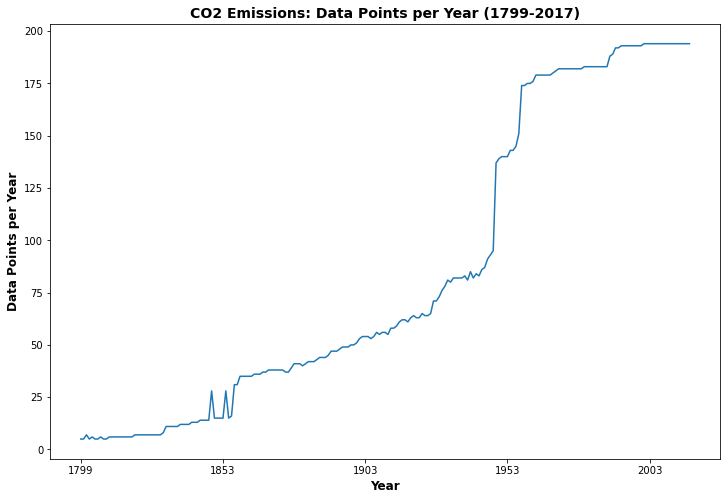

In [237]:
# create fig and graph (ax)
fig, ax = plt.subplots(figsize=(12,8))

# count non-null values per column/year and then plot bar chart
df_co2.notnull().sum().plot(ax=ax)

# ax labels (and legend if used)
ax.set_title('CO2 Emissions: Data Points per Year (1799-2017)', size=14, weight='bold')
ax.set_xlabel('Year', size=12, weight='bold')
ax.set_ylabel('Data Points per Year', size=12, weight='bold');

With the number of CO2 Emissions dataset countries/rows being 194, the figure above shows that the data is very sparce (<50% non-null per year) until circa the late-1940's when the data reporting starts to significantly improve through the 50's and 60's. Based on this information and considering the dependent variable (Population Growth Annual Rate) data is only available back to 1960, we will drop all CO2 Emissions dataset columns before 1960.

In [238]:
# generate series of columns labels to drop
drop_cols = pd.Series(df_co2.columns).iloc[0:157]

# drop columns 1799-1959
df_co2.drop(drop_cols, axis=1, inplace=True)

In [239]:
df_co2.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0536,0.0737,0.0741,0.0861,0.101,0.107,0.123,0.115,0.0865,0.150,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
Angola,0.0821,0.2100,0.2030,0.2130,0.206,0.269,0.172,0.289,0.4800,0.608,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
Albania,1.3500,1.4200,1.1600,1.0900,1.150,1.310,1.340,1.500,1.5500,1.740,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
United Arab Emirates,0.1090,0.1640,0.1760,0.1330,0.147,0.160,5.400,6.810,101.0000,65.000,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


Now that we dropped the early and most sparce data in the CO2 Emissions dataframe, let's look at the data from another angle, and see if there are any countries that are too sparce to consider filling.

In [240]:
# find and sort countries/rows with the most null values
df_co2.isnull().sum(axis=1).sort_values(ascending=False).head(20)

country
Timor-Leste              41
Eritrea                  33
Palau                    31
Marshall Islands         31
Micronesia, Fed. Sts.    31
Namibia                  30
Lesotho                  29
Liechtenstein            29
Andorra                  29
Tuvalu                   29
Palestine                29
St. Kitts and Nevis      20
Botswana                 11
Maldives                 10
Bhutan                    9
Nauru                     3
Oman                      3
Seychelles                2
Eswatini                  2
Vanuatu                   1
dtype: int64

As we can see from the sorted sums of the number of Nulls by country/row above, the majority have complete or near complete datasets from 1960 onward

To mitigate the potential distortion to the dataset resulting from Null filling operations, we will use ~20% Nulls as the threshold for keeping rows/countries in the dataframe.

In [241]:
# calculate 20% threshold
thres = int(round(len(df_co2.columns) * 0.20))

In [242]:
# dropping rows based on thres variable
df_co2_tofill = df_co2[df_co2.isnull().sum(axis=1) < thres]

In [243]:
# check that desired Nulls were removed, and see what is left
df_co2_tofill.isnull().sum(axis=1).sort_values(ascending=False).head(10)

country
Botswana          11
Maldives          10
Bhutan             9
Oman               3
Nauru              3
Eswatini           2
Seychelles         2
Vanuatu            1
United Kingdom     0
Guinea-Bissau      0
dtype: int64

In [244]:
# Transpose dataframe and fill NaNs with respective country means (down columns)
df_co2_tofill.T.fillna(df_co2_tofill.T.mean(axis=0), axis=0, inplace=True)
df_co2_tofill.isnull().sum().any()

False

In [245]:
# create final 1d analysis dataframe and assign cleaned data/value to it.
df_co2_1d = df_co2_tofill.copy()
df_co2_1d.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0536,0.0737,0.0741,0.0861,0.101,0.107,0.123,0.115,0.0865,0.150,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
Angola,0.0821,0.2100,0.2030,0.2130,0.206,0.269,0.172,0.289,0.4800,0.608,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
Albania,1.3500,1.4200,1.1600,1.0900,1.150,1.310,1.340,1.500,1.5500,1.740,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
United Arab Emirates,0.1090,0.1640,0.1760,0.1330,0.147,0.160,5.400,6.810,101.0000,65.000,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400
Argentina,2.4600,2.5400,2.3300,2.5500,2.660,2.810,2.870,2.980,3.2900,3.460,...,4.420,4.57,4.610,4.600,4.56,4.560,4.640,4.600,4.550,4.410


As can be seen in the above code cells, the countries with greater than ~20% Nulls (11 nulls in this case) were removed, and the remaining countries had their Nulls filled with their mean-values. The CO2 dataframe is now ready for 1d EDA, but before proceeding with 1d work, the 2d EDA dataframes will be prepared.

#### Preparation for 2D Analysis

##### General
In the following code cells we will prepare the dataframes for 2d EDA where will try to find correlations between the dependent variable and 3 independent variables.

First off, we will refresh on the various shapes of the 4 dataframes we will be working with so that we can better understand the max dimensions of the soon-to-be joined dataframes (which will be used for scatter plots).

In [246]:
# shape of the Population Growth dataframe
df_pop_1d.shape

(213, 60)

In [247]:
# shape of the Adult Literacy dataframe
df_lit_1d.shape

(10, 8)

In [248]:
# shape of the Happiness Score dataframe
df_hap_1d.shape

(119, 14)

In [249]:
# shape of the CO2 Emissions dataframe
df_co2_1d.shape

(182, 58)

Based on the above individual variable dataframes and using "inner" joins, we should have new bi-variate dataframes with the following maximum^ dimensions:

* Population Growth Annual % vs. Total Adult Literacy Rate:  (10, 16)
* Population Growth Annual % vs. Happiness Score:  (119, 28)
* Population Growth Annual % vs. CO2 Emissions Tonnes per Person:  (182, 116)

**^Notes:**
1. the max column dimensions above are equal to twice the independent dataframe column count.
2. The final 2d EDA dataframes will likely be smaller than the maximum dimensions above due to:
* the use of the "inner" merge/join method, where in this case the joining will be down on index (country name) - i.e. countries that do not exist in both dataframe will be removed. 
* the individual variable dataframe columns/years of data are different, and so the max columns will be closer to those of the smaller independent dataframes.

##### 2d EDA Dataframe Creation & Results
This section will outline the process taken to create each of the three 2d EDA dataframes and the results. Since this section will be the same for each of the dataframes, this sub-section will only be provided once (to cut down on redundant report text).

**Code Blocks/Process Steps**
* merge independent (population growth) and dependent variable dataframes using "inner" join, and assign y,x suffixes so that data can be differentiated in the resultant dataframe.
* validate/check the indicator column (it should only contain 'both').
* change dataframe column labels to dtype `string` to faciliate dropping columns.
* use list comprehension to capture list of columns to drop (any columns that are not overlapped/contained in each of the parent dataframes, and the "_merge" indicator column).
* drop identified columns.
* sort the dataframe.

**Resultant 2d EDA dataframes**\
As can be seen below at the end of each sub-section, each of the 2d EDA dataframe indexes are comprised of country names; the column labels are comprised of the year with a suffix (e.g. 2003_x) indicating which data type resides in the column. "_x" suffixed columns contain independent data, while "_y" suffixed columns contain the dependent variable data.

Now let's proceed with creating the first 2d EDA dataframe.

##### Population Growth Annual % vs. Total Adult Literacy Rate Dataframe


In [250]:
# merge population and literacy dataframes on country (indexes) and validate
pop_vs_lit = pd.merge(
    df_pop_1d,
    df_lit_1d,
    how="inner",
    on=None,
    left_on=None,
    right_on=None,
    left_index=True,
    right_index=True,
    sort=True,
    suffixes=("_y", "_x"),
    copy=True,
    indicator=True,
    validate="1:1")

In [251]:
# check validation/indicator column
pop_vs_lit['_merge'].unique()

['both']
Categories (1, object): ['both']

In [252]:
# convert merged cdataframe column labels to string (to faciliate dropping columns in next code block)
cols = pd.Series(pop_vs_lit.columns).convert_dtypes()

In [253]:
# list of columns to drop (validation/indicator column and non-overlapped columns (i.e. non-suffixed columns)
drop_cols = [c for c in cols if (("_" not in c) or ("_merge" in c))]

In [254]:
# drop list of columns inplace 
pop_vs_lit.drop(drop_cols, axis=1, inplace=True) 

In [255]:
# sort dataframe using column labels - this is the final dataframe/set to be used in 2d EDA plotting
pop_vs_lit.sort_index(axis=1, inplace=True)
pop_vs_lit

,2003_x,2003_y,2004_x,2004_y,2005_x,2005_y,2006_x,2006_y,2007_x,2007_y,2008_x,2008_y,2009_x,2009_y,2010_x,2010_y
country,,,,,,,,,,,,,,,,
Brazil,88.60,1.2000,89.816667,1.15000,89.60,1.090,90.0,1.040,90.0,0.994,90.3,0.962,90.4,0.938,89.816667,0.916
Colombia,92.80,1.4200,92.800000,1.35000,92.30,1.290,92.7,1.230,93.4,1.180,93.2,1.110,93.4,1.050,93.600000,0.968
El Salvador,79.80,0.4950,83.000000,0.46900,83.60,0.450,82.0,0.434,84.0,0.424,84.1,0.422,84.5,0.425,83.000000,0.431
Indonesia,90.40,1.3400,92.000000,1.34000,92.00,1.330,92.0,1.320,92.2,1.320,92.6,1.330,92.0,1.340,92.800000,1.350
Mexico,91.00,1.3800,91.600000,1.42000,91.70,1.460,92.8,1.490,92.9,1.500,93.4,1.480,93.1,1.440,93.500000,1.390
Qatar,89.00,9.9800,93.420000,13.90000,93.42,16.700,93.1,17.500,94.0,16.500,94.7,14.100,96.3,11.500,93.420000,9.230
Spain,97.76,1.7300,97.800000,1.69000,97.76,1.690,97.9,1.850,97.6,1.600,97.7,0.886,97.8,0.460,97.760000,0.355
Turkey,87.40,1.3800,88.200000,1.32000,88.10,1.250,88.7,1.190,90.0,1.200,90.8,1.270,92.7,1.400,94.100000,1.530
Uruguay,98.06,-0.0655,98.060000,0.00942,97.80,0.108,97.9,0.191,98.2,0.254,98.3,0.283,98.1,0.286,98.060000,0.287


In [256]:
# shape of final 2d EDA dataframe
pop_vs_lit.shape

(9, 16)

As can be seen above, based on the small size of the Literacy dataframe, the resultant 2d EDA dataframe is small. With this limited data, the correlation investigation results may not be useful (e.g. the results may not be considered extendable to a global perspective), but the investigation will be carried nonetheless.

Moving onto the next 2d EDA dataframe.

##### Population Growth Annual % vs. Happiness Score Dataframe

In [257]:
# merge population and literacy dataframes on country (indexes) and validate
pop_vs_hap = pd.merge(
    df_pop_1d,
    df_hap_1d,
    how="inner",
    on=None,
    left_on=None,
    right_on=None,
    left_index=True,
    right_index=True,
    sort=True,
    suffixes=("_y", "_x"),
    copy=True,
    indicator=True,
    validate="1:1")
pop_vs_hap

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010_x,2011_x,2012_x,2013_x,2014_x,2015_x,2016_x,2017_x,2018_x,_merge
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.90,1.97,2.03,2.09,2.15,2.17,2.19,2.25,2.38,2.54,...,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7,both
Albania,3.12,3.06,2.95,2.88,2.75,2.63,2.63,2.84,2.90,2.55,...,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8,both
Argentina,1.62,1.60,1.58,1.55,1.52,1.50,1.48,1.48,1.50,1.53,...,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7,both
Armenia,3.53,3.44,3.33,3.19,3.04,2.88,2.73,2.62,2.54,2.49,...,42.6,43.2,42.8,44.5,43.5,43.3,42.9,50.6,46.8,both
Australia,1.99,2.44,1.92,1.96,1.96,2.28,1.26,1.76,2.09,1.97,...,74.1,72.0,73.6,72.9,73.1,72.5,72.6,71.8,72.2,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,3.59,3.53,3.48,3.44,3.39,3.35,3.31,3.25,3.18,3.10,...,65.8,70.7,65.5,61.4,55.7,40.4,50.7,50.1,50.5,both
Vietnam,3.00,2.98,2.95,2.92,2.89,2.86,2.82,2.76,2.67,2.56,...,57.7,55.3,50.2,50.8,50.8,50.6,51.8,53.0,53.5,both
Yemen,1.45,1.48,1.51,1.52,1.52,1.53,1.56,1.58,1.57,1.57,...,37.5,40.6,42.2,39.7,29.8,38.3,32.5,30.6,35.3,both


In [258]:
# check validation/indicator column
pop_vs_hap['_merge'].unique()

['both']
Categories (1, object): ['both']

In [259]:
# convert merged dataframe column labels to string (to faciliate dropping columns in next code block)
cols = pd.Series(pop_vs_hap.columns).convert_dtypes()

In [260]:
# list of columns to drop (validation/indicator column and non-overlapped columns (i.e. non-suffixed columns)
drop_cols = [c for c in cols if (("_" not in c) or ("_merge" in c))]

In [261]:
# drop list of columns inplace 
pop_vs_hap.drop(drop_cols, axis=1, inplace=True) 

In [262]:
# sort dataframe using column labels - this is the final dataframe/set to be used in 2d EDA plotting
pop_vs_hap.sort_index(axis=1, inplace=True)
pop_vs_hap

,2005_x,2005_y,2006_x,2006_y,2007_x,2007_y,2008_x,2008_y,2009_x,2009_y,...,2014_x,2014_y,2015_x,2015_y,2016_x,2016_y,2017_x,2017_y,2018_x,2018_y
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,36.091667,2.990,36.091667,2.490,37.200000,2.270,44.000000,2.400,47.600000,2.750,...,39.8,3.080,42.2,2.780,26.6,2.550,26.9,2.380,25.7,2.310
Albania,49.808333,-0.631,46.300000,-0.756,49.808333,-0.767,54.900000,-0.674,52.700000,-0.496,...,46.1,-0.291,45.1,-0.160,46.4,-0.092,50.0,-0.247,48.8,-0.426
Argentina,63.100000,1.020,60.700000,0.999,59.600000,0.993,64.200000,1.000,64.400000,0.752,...,67.0,1.080,64.3,1.060,60.4,1.040,57.9,1.020,59.7,0.993
Armenia,42.900000,-0.773,48.800000,-0.872,46.500000,-0.856,41.800000,-0.674,43.700000,-0.374,...,43.5,0.451,43.3,0.361,42.9,0.294,50.6,0.236,46.8,0.203
Australia,72.891667,1.480,72.900000,0.625,72.500000,2.000,72.891667,2.060,74.500000,1.560,...,73.1,1.440,72.5,1.560,72.6,1.680,71.8,1.540,72.2,1.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,65.300000,1.570,60.415385,1.470,62.600000,1.410,71.900000,1.420,74.800000,1.450,...,55.7,0.129,40.4,-0.769,50.7,-1.510,50.1,-1.770,50.5,-1.290
Vietnam,52.900000,0.932,54.200000,0.943,54.800000,0.960,53.000000,0.979,53.000000,1.000,...,50.8,1.040,50.6,1.030,51.8,1.020,53.0,0.994,53.5,0.954
Yemen,38.575000,2.840,44.800000,2.830,38.575000,2.820,48.100000,2.810,43.500000,2.800,...,29.8,2.580,38.3,2.500,32.5,2.420,30.6,2.360,35.3,2.300


In [263]:
# shape of final 2d EDA dataframe
pop_vs_hap.shape

(115, 28)

As can be seen above, the 2 parent dataframes had much more overlap compared to the previous coupling - in this case, the row dimension is only 4 less than the max merged size identified earlier. With 14 years of data and 115 countries, a potential correlation between the 2 variables might be able to be extrapolated to provide limited insight on a global perspective.

Moving onto the final 2d EDA dataframe.

##### Population Growth Annual % vs. CO2 Emissions Tonnes per Person Dataframe

In [264]:
# merge population and literacy dataframes on country (indexes) and validate
pop_vs_co2 = pd.merge(
    df_pop_1d,
    df_co2_1d,
    how="inner",
    on=None,
    left_on=None,
    right_on=None,
    left_index=True,
    right_index=True,
    sort=True,
    suffixes=("_y", "_x"),
    copy=True,
    indicator=True,
    validate="1:1")
pop_vs_co2

,1960_y,1961_y,1962_y,1963_y,1964_y,1965_y,1966_y,1967_y,1968_y,1969_y,...,2009_x,2010_x,2011_x,2012_x,2013_x,2014_x,2015_x,2016_x,2017_x,_merge
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.90,1.97,2.03,2.090,2.150,2.170,2.190,2.2500,2.380,2.540,...,0.290,0.406,0.345,0.280,0.253,0.262,0.245,0.247,0.254,both
Albania,3.12,3.06,2.95,2.880,2.750,2.630,2.630,2.8400,2.900,2.550,...,1.560,1.790,1.690,1.690,1.900,1.600,1.570,1.610,1.590,both
Algeria,2.49,2.47,2.49,2.560,2.660,2.760,2.850,2.8800,2.870,2.830,...,3.280,3.270,3.430,3.480,3.680,3.800,3.640,3.560,3.690,both
Angola,1.39,1.38,1.26,0.974,0.618,0.186,-0.119,-0.0427,0.548,1.480,...,1.240,1.250,1.350,1.280,1.640,1.220,1.180,1.140,1.120,both
Antigua and Barbuda,1.60,1.52,1.51,1.640,1.820,2.050,2.190,2.0700,1.630,0.988,...,5.960,5.750,5.800,5.730,5.700,5.840,5.900,5.890,5.880,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,3.59,3.53,3.48,3.440,3.390,3.350,3.310,3.2500,3.180,3.100,...,6.670,5.900,6.510,6.140,6.130,5.690,5.470,5.230,4.810,both
Vietnam,3.00,2.98,2.95,2.920,2.890,2.860,2.820,2.7600,2.670,2.560,...,1.550,1.630,1.510,1.550,1.750,1.950,1.960,1.950,2.160,both
Yemen,1.45,1.48,1.51,1.520,1.520,1.530,1.560,1.5800,1.570,1.570,...,1.000,0.849,0.747,0.994,0.937,0.480,0.377,0.363,0.356,both


In [265]:
# check validation/indicator column
pop_vs_co2['_merge'].unique()

['both']
Categories (1, object): ['both']

In [266]:
# convert merged dataframe column labels to string (to faciliate dropping columns in next code block)
cols = pd.Series(pop_vs_co2.columns).convert_dtypes()

In [267]:
# list of columns to drop (validation/indicator column and non-overlapped columns (i.e. non-suffixed columns)
drop_cols = [c for c in cols if (("_" not in c) or ("_merge" in c))]

In [268]:
# drop list of columns inplace 
pop_vs_co2.drop(drop_cols, axis=1, inplace=True) 

In [269]:
# sort dataframe using column labels - this is the final dataframe/set to be used in 2d EDA plotting
pop_vs_co2.sort_index(axis=1, inplace=True)
pop_vs_co2

,1960_x,1960_y,1961_x,1961_y,1962_x,1962_y,1963_x,1963_y,1964_x,1964_y,...,2013_x,2013_y,2014_x,2014_y,2015_x,2015_y,2016_x,2016_y,2017_x,2017_y
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0536,1.90,0.0737,1.97,0.0741,2.03,0.0861,2.090,0.101,2.150,...,0.253,3.360,0.262,3.080,0.245,2.780,0.247,2.550,0.254,2.380
Albania,1.3500,3.12,1.4200,3.06,1.1600,2.95,1.0900,2.880,1.150,2.750,...,1.900,-0.207,1.600,-0.291,1.570,-0.160,1.610,-0.092,1.590,-0.247
Algeria,0.5350,2.49,0.4880,2.47,0.4550,2.49,0.4620,2.560,0.525,2.660,...,3.680,2.030,3.800,2.050,3.640,2.050,3.560,2.040,3.690,2.010
Angola,0.0821,1.39,0.2100,1.38,0.2030,1.26,0.2130,0.974,0.206,0.618,...,1.640,3.500,1.220,3.440,1.180,3.380,1.140,3.320,1.120,3.280
Antigua and Barbuda,0.8670,1.60,1.8400,1.52,1.4900,1.51,1.5900,1.640,2.560,1.820,...,5.700,1.140,5.840,1.080,5.900,1.010,5.890,0.953,5.880,0.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,6.1500,3.59,6.1900,3.53,6.2100,3.48,6.0400,3.440,6.270,3.390,...,6.130,0.876,5.690,0.129,5.470,-0.769,5.230,-1.510,4.810,-1.770
Vietnam,0.2370,3.00,0.2690,2.98,0.2550,2.95,0.3210,2.920,0.348,2.890,...,1.750,1.050,1.950,1.040,1.960,1.030,1.950,1.020,2.160,0.994
Yemen,0.4940,1.45,0.7100,1.48,0.5250,1.51,0.6440,1.520,0.686,1.520,...,0.937,2.650,0.480,2.580,0.377,2.500,0.363,2.420,0.356,2.360


In [270]:
# shape of final 2d EDA dataframe
pop_vs_co2.shape

(179, 116)

As can be seen above, the 2 parent dataframes have substantial overlap - the most overlap of all three couplings. In this case, the resultant number of rows/countries are only 3 less than the max dimension identified earlier, and there are 58 years of data. Based on this, a potential correlation between the 2 variables might be able to be extrapolated to provide limited insights globally.

<a id='eda'></a>
## Exploratory Data Analysis

Before looking at potential correlations between the dependent and indepedent variables, we will first look at each variable separately (i.e., 1d EDA) via summary statistics and plots to gain a better understanding of them, and answer variable-specific questions posed.

###  Annual Population Growth Rates (Dependent Variable) - Question P1
> What countries have the highest growth rates?

#### Summary Statistics

In [271]:
# population growth rate summary statistics
df_pop_1d.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,2.258193,2.295512,2.344334,2.286818,2.283831,2.244227,2.244287,2.243985,2.198934,2.180272,...,1.290080,1.315127,1.303393,1.272983,1.250823,1.236626,1.211549,1.185618,1.178719,1.130190
std,1.349185,1.432259,1.638899,1.419566,1.411850,1.406951,1.432180,1.588015,1.507092,1.591808,...,1.494071,1.434995,1.450813,1.364367,1.284263,1.212156,1.190538,1.184291,1.098696,1.072507
min,-1.020000,-0.460000,-0.851000,-1.200000,-1.450000,-1.760000,-2.010000,-2.110000,-1.890000,-1.440000,...,-2.630000,-3.100000,-4.300000,-4.530000,-3.890000,-3.000000,-2.420000,-4.050000,-1.670000,-1.720000
25%,1.400000,1.400000,1.380000,1.400000,1.360000,1.220000,1.260000,1.310000,1.290000,1.230000,...,0.337000,0.376000,0.450000,0.431000,0.443000,0.485000,0.398000,0.417000,0.372000,0.320000
50%,2.160000,2.240000,2.270000,2.290000,2.290000,2.320000,2.300000,2.270000,2.230000,2.190000,...,1.180000,1.150000,1.160000,1.140000,1.120000,1.120000,1.140000,1.080000,1.050000,1.040000
75%,2.970000,2.970000,2.960000,2.920000,2.920000,2.880000,2.880000,2.890000,2.850000,2.840000,...,2.220000,2.200000,2.100000,2.030000,2.120000,2.050000,2.010000,1.970000,1.950000,1.890000
max,8.680000,10.600000,12.900000,9.830000,9.320000,9.310000,9.110000,12.600000,10.600000,14.400000,...,9.230000,7.580000,7.350000,6.740000,5.790000,4.850000,4.680000,4.920000,4.470000,4.120000


High level observations from the truncated summary statistics view shown above:
* The average population growth rates appear to range between approximately 1-2%
* Standard Deviation (SD) appears to be between 1-1.6%
* Annual minimums and maximums depart significantly from the means, indicating the data may be skewed and/or there may be outliers.
* The maximums seem much larger than the minimums in terms of magnitude. 

Since there is a lot of data and the `.describe()` method truncates the ouput by default, lets further summerize the descriptive statistics data and look at the average of each row.

In [272]:
# mean/average of each row in the summary statistics above.
df_pop_1d.describe().mean(axis=1)

count    213.000000
mean       1.762699
std        1.598448
min       -2.838683
25%        0.747883
50%        1.725833
75%        2.572500
max       11.286167
dtype: float64

Looking at mean summary stats above we see:
* The mean Population Annual Growth Rate (%) is actually about 1.8%
* The SD of the means is actually approximately 1.6 
* The minimum and maximum means are roughly -2.8 and 11.3 respectively, which support with what we observed in the overall summary stats (i.e., the maximums are larger and further away from the means than the minimums). 

Now that we have a overall understanding of the data (e.g. means, min, max, etc.), let's address question-1 and try to determine which countries have the growth rates on average.

In [273]:
# transpose dataframe -> access/slice mean rate by country -> sort and display top 10
df_pop_1d.T.describe().loc['mean'].sort_values(ascending=False).head(10)

country
United Arab Emirates         7.785633
Qatar                        6.844000
Sint Maarten (Dutch part)    4.445650
Djibouti                     4.113867
Jordan                       3.986483
Bahrain                      3.915167
St. Martin (French part)     3.821750
Oman                         3.708838
Saudi Arabia                 3.570000
Cayman Islands               3.537300
Name: mean, dtype: float64

The top 10 average growth rate countries are shown above, and the U.A.E. appears to have the highest rate. Before moving to question 2 lets present and compare these countries and respective growth rates using a bar plot below.

#### Bar Plot

In [274]:
# create new dataframe to use for plotting
df_pop_1d_top10 = df_pop_1d.T.describe().loc['mean'].sort_values(ascending=False).head(10)

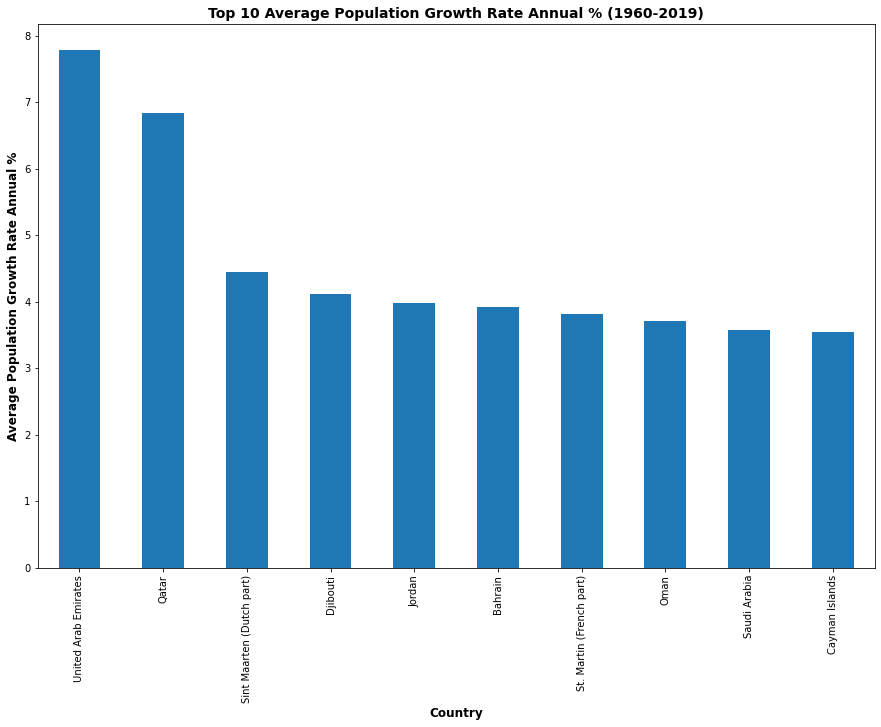

In [275]:
# create fig and a single axes/plot (ax)
fig, ax = plt.subplots(figsize=(15,10))

# plot top 10 country growth rates in bar chart
df_pop_1d_top10.plot.bar(figsize=(15,10), ax=ax)

# ax labeling (and legend if used)
ax.set_title('Top 10 Average Population Growth Rate Annual % (1960-2019)', size=14, weight='bold')
ax.set_ylabel('Average Population Growth Rate Annual %', size=12, weight='bold')
ax.set_xlabel('Country', size=12, weight='bold');

From the bar chart above, it can be seen that 8 of 10 countries are around a 4% annual growth on average,
whereas the Qatar and UAE rates are much larger, at approximately 6.8% and 7.8% respectively. Of note, 7 of 10 countries are from or near the Middle-Eastern region.

###  Annual Population Growth Rates (Dependent Variable) - Question P2
> Does global population growth appear to be accelerating or decelerating?

To try and address this question we will plot the mean Population Growth Annual % rate for each year for each country in the 1d EDA dataframe.

#### Line Plot

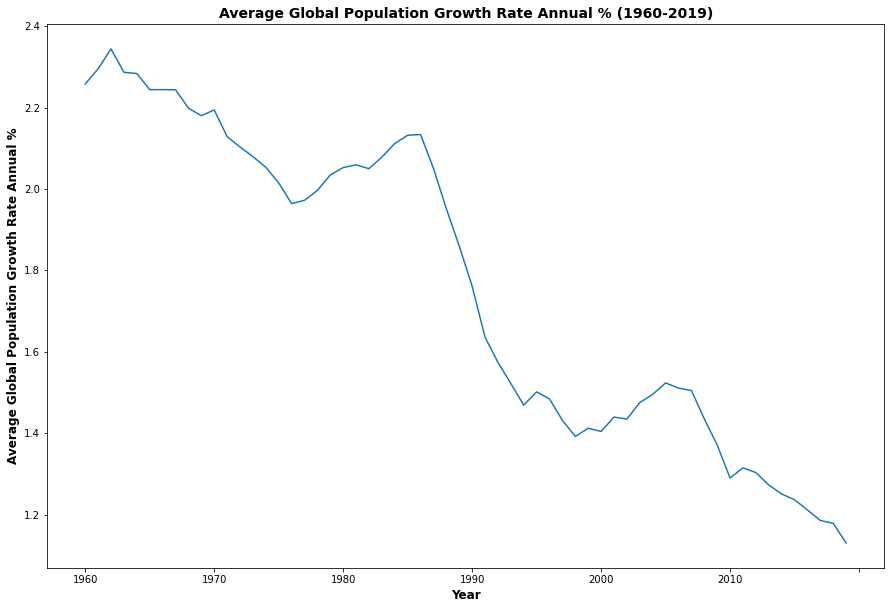

In [276]:
# create fig and a single axes/plot (ax)
fig, ax = plt.subplots(figsize=(15,10))

# line plot of mean population growth rate for each country (i.e. global growth rate) across all years.
df_pop_1d.mean().plot(figsize=(15,10), ax=ax)

# ax labeling (and legend if used)
ax.set_title('Average Global Population Growth Rate Annual % (1960-2019)', size=14, weight='bold')
ax.set_ylabel('Average Global Population Growth Rate Annual %', size=12, weight='bold')
ax.set_xlabel('Year', size=12, weight='bold');

The line chart/plot above indicates world annual population growth rate is trending downward (growth is decelerating), from approximate average of 2.3% in the early 1960s, to less than 1.2% in the late 2010's.

###  Annual Literacy Rates, Total Adult (Independent Variable) - Question L1
> What countries have the highest literacy rates?

To gain insights with respect to the first question, let's look at some descriptive statistics.

#### Summary Statistics

In [277]:
# summary stats
df_lit_1d.describe()

,2003,2004,2005,2006,2007,2008,2009,2010
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,90.71200,92.078238,91.978000,92.100000,92.640000,92.970000,93.320000,93.135667
std,5.25105,4.443171,4.252962,4.599034,4.067814,4.045862,3.983243,4.288708
min,79.80000,83.000000,83.600000,82.000000,84.000000,84.100000,84.500000,83.000000
25%,88.70000,90.262500,90.125000,90.500000,90.550000,91.250000,92.175000,92.955000
50%,90.70000,92.400000,92.150000,92.750000,93.150000,93.300000,93.250000,93.550000
75%,92.67500,93.919286,93.480000,93.700000,94.075000,94.675000,95.950000,95.000000
max,98.06000,98.060000,97.800000,97.900000,98.200000,98.300000,98.100000,98.060000


In [278]:
# mean values for each summary stat metric
df_lit_1d.describe().mean(axis=1)

count    10.000000
mean     92.366738
std       4.366481
min      83.000000
25%      90.814687
50%      92.656250
75%      94.184286
max      98.060000
dtype: float64

Of note, from the Total Adult Literacy Rates summary statistics code cells above:
* Annual rates average in the low 90-percentiles.
* The country literacy rates do vary appreciably based on the standard deviation average of ~4.4, and range of ~80%-98%.

To determine which countries have the highest Total Adult Literacy Rates in the limited dataframe, we will plot all 10 countries, specifically their mean literacy rates across all years.

**Note:**  While we are attempting to understand which country(ies) have the highest rates, it must be kept in mind that this dataset is very limited with far fewer countries than exist globally (and far fewer countries than were contained in the Population Growth Annnual % dataset). This lack of literacy data is a major limitation for the EDA work and any potential correlation extrapolation insights.

#### Bar Plot

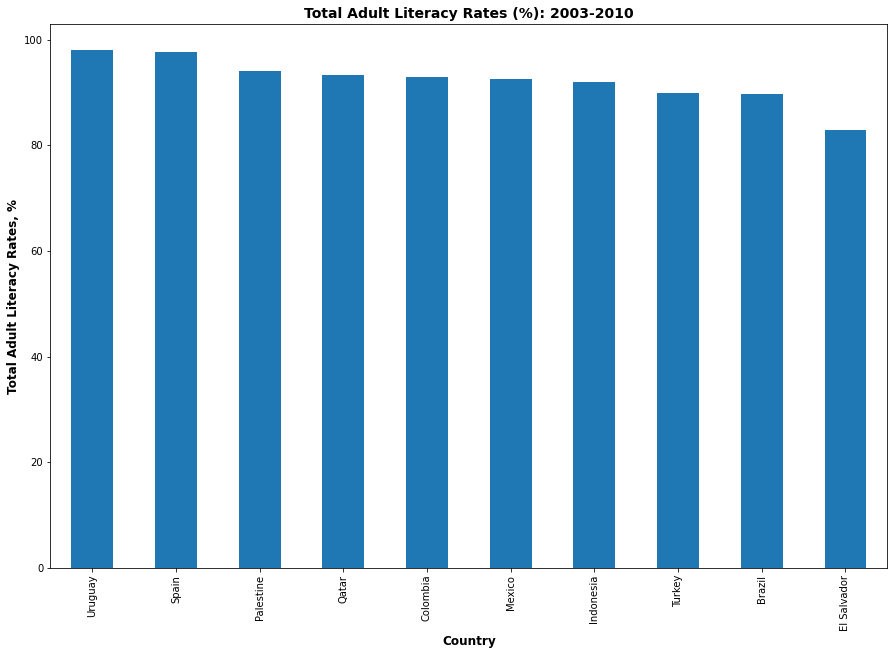

In [279]:
# create fig and a single axes/plot (ax)
fig, ax = plt.subplots(figsize=(15,10))

# plot country literacy rates in bar chart to compare
df_lit_1d.T.describe().loc['mean'].sort_values(ascending=False).plot.bar(figsize=(15,10), ax=ax)

# ax labeling (and legend if used)
ax.set_title('Total Adult Literacy Rates (%): 2003-2010', size=14, weight='bold')
ax.set_ylabel('Total Adult Literacy Rates, %', size=12, weight='bold')
ax.set_xlabel('Country', size=12, weight='bold');

Since Spain and Uruguay are very close, lets look at the data before decalring which country has the highest rate.

In [280]:
# show top 2 countries/data from plot
df_lit_1d.T.describe().loc['mean'].sort_values(ascending=False).head(2)

country
Uruguay    98.06
Spain      97.76
Name: mean, dtype: float64

After looking at the data, we can see that Uruguay has a slightly higher Total Adult LIteracy Rate than Spain (by 0.30%).

###  Annual Literacy Rates, Total Adult (Independent Variable) - Question L2
> Does adult literacy appear to be improving globally?

In the same fashion as earlier, we will use the full (albeit small/limited) cleaned dataframe to attempt to address this question, and create a line plot.

#### Line Plot

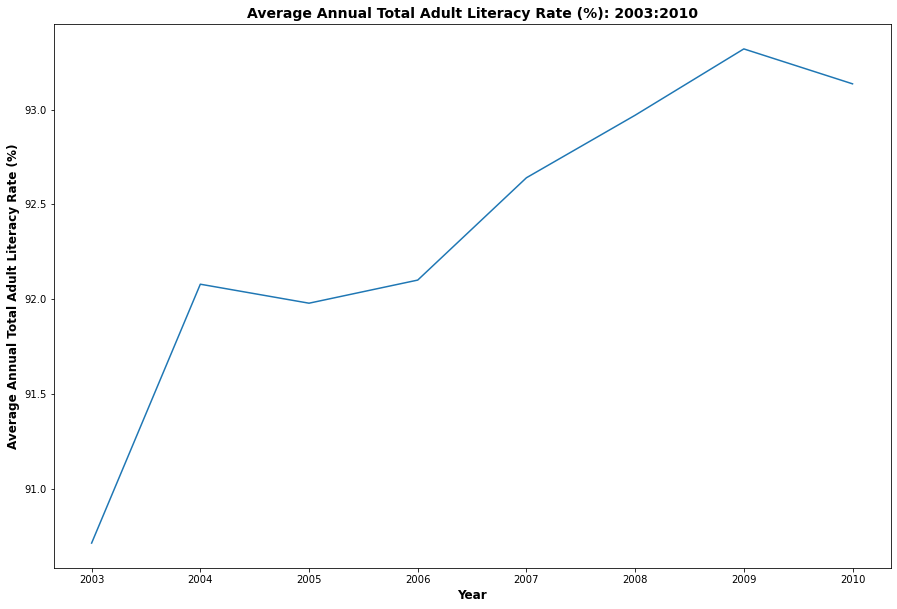

In [281]:
# create fig and a single axes/plot (ax)
fig, ax = plt.subplots(figsize=(15,10))

# line plot of mean literacy rates by year.
df_lit_1d.mean().plot(figsize=(15,10), ax=ax)

# ax labeling (and legend if used)
ax.set_title('Average Annual Total Adult Literacy Rate (%): 2003:2010', size=14, weight='bold')
ax.set_ylabel('Average Annual Total Adult Literacy Rate (%)', size=12, weight='bold')
ax.set_xlabel('Year', size=12, weight='bold');

The line plot above indicates that literacy is improving, but due to the very small dataset in the underlying dataframe, it is uncertain if the same trend exists worldwide - although one could hypothesis that it is due to advances in techology and communication providing easier and more widespread access to education.

###  Happiness Scores (Independent Variable) - Question H1
> What are the top countries in terms of Happiness Score?

As before, lets start with summary statistics to get a better understanding of the data before attempting to answer the questions posed.

#### Summary Statistics

In [282]:
# summary stats
df_hap_1d.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,53.558968,54.682608,54.729813,55.176019,54.960636,55.516176,54.886118,54.629412,54.978361,54.724370,54.748228,55.458894,55.774044,55.817647
std,11.060832,10.970534,10.904883,10.786324,11.367007,10.800331,10.924279,11.618201,11.124204,10.670575,10.799393,11.173944,10.895726,10.934386
min,33.300000,32.800000,30.000000,34.100000,32.300000,35.200000,31.900000,33.300000,31.300000,29.800000,29.000000,26.600000,26.900000,25.700000
25%,45.900000,46.440909,46.450000,46.400000,46.300000,47.850000,46.450000,46.750000,46.600000,47.550000,45.600000,46.800000,48.746154,47.950000
50%,52.323077,53.000000,53.000000,53.800000,54.600000,53.900000,53.700000,52.900000,54.400000,55.100000,54.500000,56.300000,56.500000,56.900000
75%,61.600000,62.772727,62.150000,63.150000,63.300000,65.250000,62.950000,64.100000,64.500000,63.550000,61.650000,63.300000,62.950000,63.550000
max,76.700000,78.300000,79.700000,76.800000,77.700000,77.900000,75.600000,75.900000,75.100000,75.100000,76.600000,77.900000,78.600000,78.100000


In [283]:
# mean values for each summary stat metric
df_hap_1d.describe().mean(axis=1)

count    119.000000
mean      54.974378
std       11.002187
min       30.871429
25%       46.841933
50%       54.351648
75%       63.198052
max       77.142857
dtype: float64

From the above summary statistics and respective averages, we see that:
* there are 119 countries remaining in the cleaned dataset, but only 14 years of data (as in earlier findings)
* the mean Happiness Score across all years in the cleaned dataset is ~55%
* There is significant variabiity in the scores across the countries based on the mean standard deviation (~11) and average min and max values, ~31 and ~77, respectively.

Lets plot the top 20 countries in terms of highest average Happiness Scores, and then indentify the highest score as well.

#### Bar Plot

In [284]:
# generate mean values for each country/row
df_hap_1d.mean(axis=1)

country
Afghanistan             36.091667
Albania                 49.808333
United Arab Emirates    68.358333
Argentina               63.307143
Armenia                 44.564286
                          ...    
Vietnam                 52.971429
Yemen                   38.575000
South Africa            48.507143
Zambia                  45.638462
Zimbabwe                39.785714
Length: 119, dtype: float64

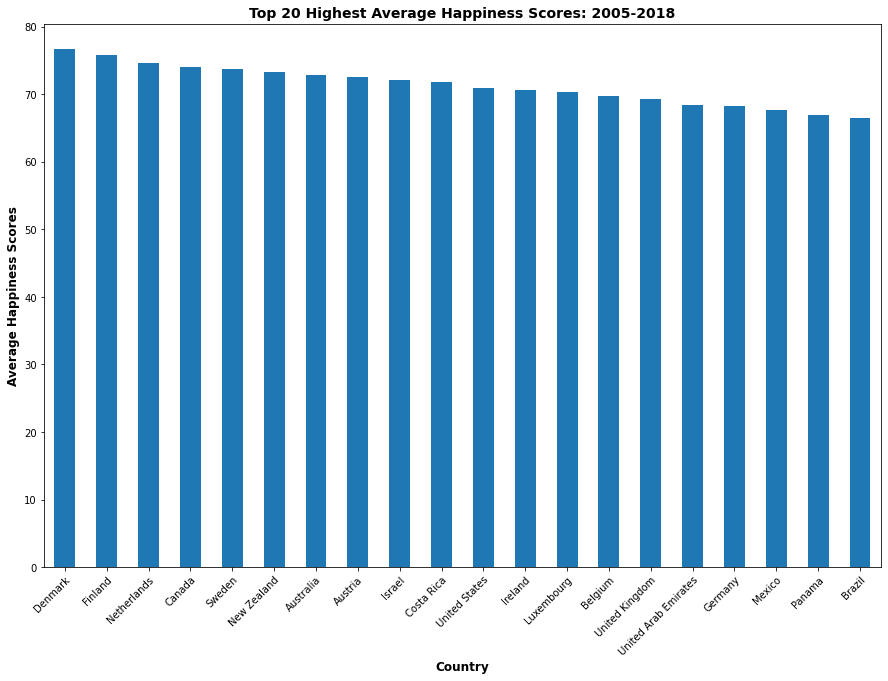

In [285]:
# create fig and a single axes/plot (ax)
fig, ax = plt.subplots(figsize=(15,10))

# sort and plot top20 mean happiness scores in bar chart to compare
df_hap_1d.mean(axis=1).sort_values(ascending=False).head(20).plot.bar(figsize=(15,10), ax=ax)

# ax labeling (and legend if used)
ax.set_title('Top 20 Highest Average Happiness Scores: 2005-2018', size=14, weight='bold')
ax.set_ylabel('Average Happiness Scores', size=12, weight='bold')
ax.set_xlabel('Country', size=12, weight='bold')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");

From the bar plot above we can see that Denmark has the highest average Happiness Score for the years 2005-2018; and in the Top 5 Happiness Scored countries, 3 of them are Nordic Countries, 1 is European, and 1 is North American.

###  Happiness Scores (Independent Variable) - Question H2
> Overall does it appear that Happiness (Scores) of countries are improving?

In similar fashion to the previous variables, a line plot of average annual values will be used to address this question.

#### Line Plot

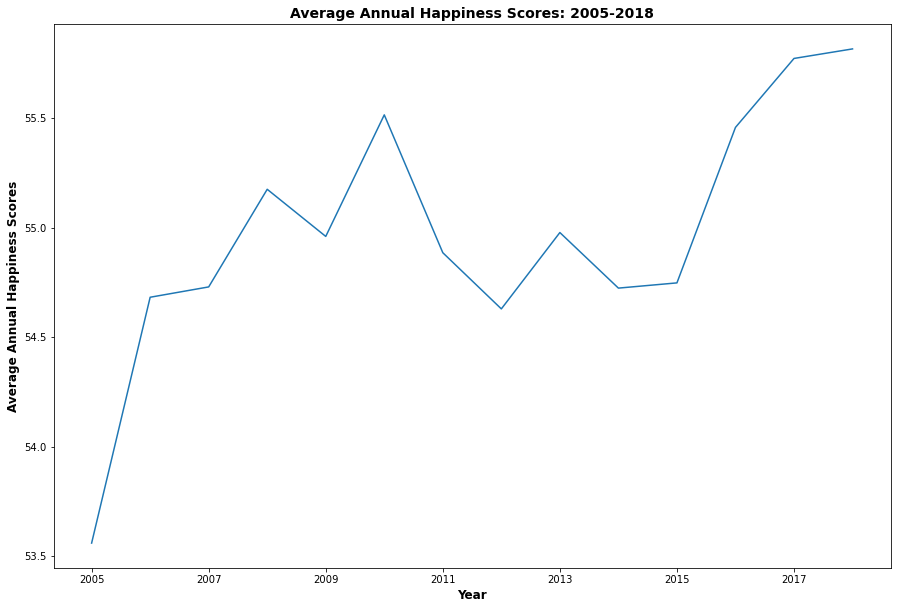

In [286]:
# create fig and a single axes/plot (ax)
fig, ax = plt.subplots(figsize=(15,10))

# line plot of mean happiness scores by year
df_hap_1d.mean().plot(figsize=(15,10), ax=ax)

# ax labeling (and legend if used)
ax.set_title('Average Annual Happiness Scores: 2005-2018', size=14, weight='bold')
ax.set_ylabel('Average Annual Happiness Scores', size=12, weight='bold')
ax.set_xlabel('Year', size=12, weight='bold');

The Average Annual Happiness Scores line chart above indicates that Happiness Scores are trending higher over time.

###  CO2 Emissions (Tonnes) per Person (Independent Variable) - Question C1
> C1. Overall which countries have the highest CO2 emissions per person?

As before, lets start with summary statistics to get a better understanding of the data before attempting to answer the questions posed.

#### Summary Statistics

In [287]:
# summary stats
df_co2_1d.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,...,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,2.518608,2.684635,3.246712,3.378471,3.503588,3.487372,3.564126,3.728059,4.407050,4.724159,...,4.732554,4.843792,4.782146,4.836164,4.745052,4.702466,4.593155,4.561520,4.583073,4.591373
std,4.543432,4.957266,8.797856,8.936304,9.147652,8.441681,7.585148,7.449564,10.373530,9.655105,...,6.235107,6.263106,6.169051,6.327923,6.029763,6.144657,5.914669,5.742596,5.750863,5.703691
min,0.007860,0.008440,0.009340,0.011600,0.011800,0.013200,0.011800,0.000000,0.016100,0.012300,...,0.022700,0.030400,0.036600,0.034200,0.041900,0.038300,0.036700,0.025400,0.024400,0.024300
25%,0.173000,0.186250,0.187750,0.208500,0.227250,0.230500,0.228250,0.257250,0.306250,0.325750,...,0.543500,0.609000,0.625000,0.635000,0.670250,0.677000,0.672500,0.657750,0.683000,0.688750
50%,0.833000,0.959000,0.878936,0.867000,0.882000,1.010000,1.135000,1.233969,1.218969,1.320000,...,2.450000,2.470000,2.455000,2.540000,2.570000,2.565000,2.590000,2.555000,2.560000,2.585000
75%,3.245000,3.385000,3.525000,3.690000,3.915000,4.277500,4.810000,4.880000,5.125000,5.935000,...,6.415000,6.715000,6.812500,6.635000,6.570000,6.312500,5.967500,6.312500,6.310000,6.240000
max,36.500000,42.400000,99.500000,92.900000,85.500000,78.600000,77.500000,76.000000,101.000000,69.100000,...,41.500000,38.800000,39.200000,42.500000,36.000000,43.100000,41.300000,38.500000,39.800000,38.000000


In [288]:
# mean values for each summary stat metric
df_co2_1d.describe().mean(axis=1)

count    182.000000
mean       4.568952
std        7.200357
min        0.022799
25%        0.441091
50%        1.873325
75%        6.268405
max       55.939655
dtype: float64

In [289]:
# dataframe dimensions for reference
df_co2_1d.shape

(182, 58)

From the above summary statistics and respective means/averages, we see that:
* There are 182 countries remaining in the cleaned dataset, and 58 years of data (as in earlier findings)
* The annual mean CO2 Emissions (Tonnes) per Person in the cleaned dataset is ~4.6 Tonnes (which seems like a lot!)
* There is significant variabiity in the scores across the countries based on the mean standard deviation (~7 Tonnes) and average min and max values, ~0 and ~56 Tonnes, respectively.

We will plot the 20 countries below that have the highest average annual CO2 Emissions (Tonnes) per Person, and indentify the highest emitter per person as well.

#### Bar Plot

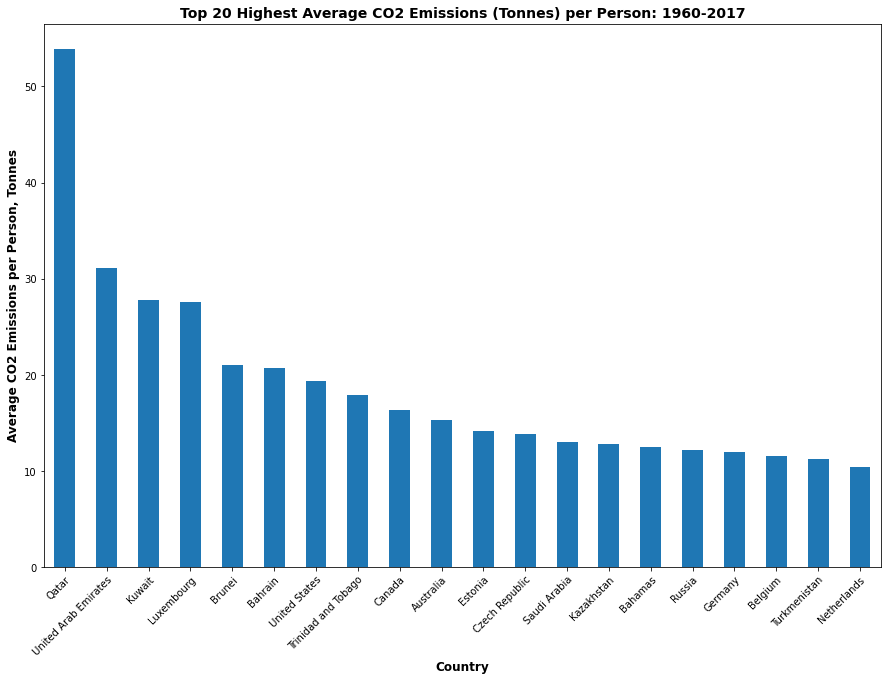

In [290]:
# create fig and a single axes/plot (ax)
fig, ax = plt.subplots(figsize=(15,10))

# plot country co2 emissions in bar chart to compare
df_co2_1d.mean(axis=1).sort_values(ascending=False).head(20).plot.bar(figsize=(15,10), ax=ax)

# ax labeling (and legend if used)
ax.set_title('Top 20 Highest Average CO2 Emissions (Tonnes) per Person: 1960-2017', size=14, weight='bold')
ax.set_ylabel('Average CO2 Emissions per Person, Tonnes', size=12, weight='bold')
ax.set_xlabel('Country', size=12, weight='bold')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");

From the bar plot showing the top 20 highest CO2 emitting countries (per person) on average, we can see that Qatar appears to be the highest emitter for the time period by far.

### CO2 Emissions (Tonnes) per Person (Independent Variable) - Question C2
> * C2.  Overall do CO2 emissions per person appear to be improving?

In similar fashion to the previous variables, a line plot of average annual values will be used to address this question.

#### Line Plot

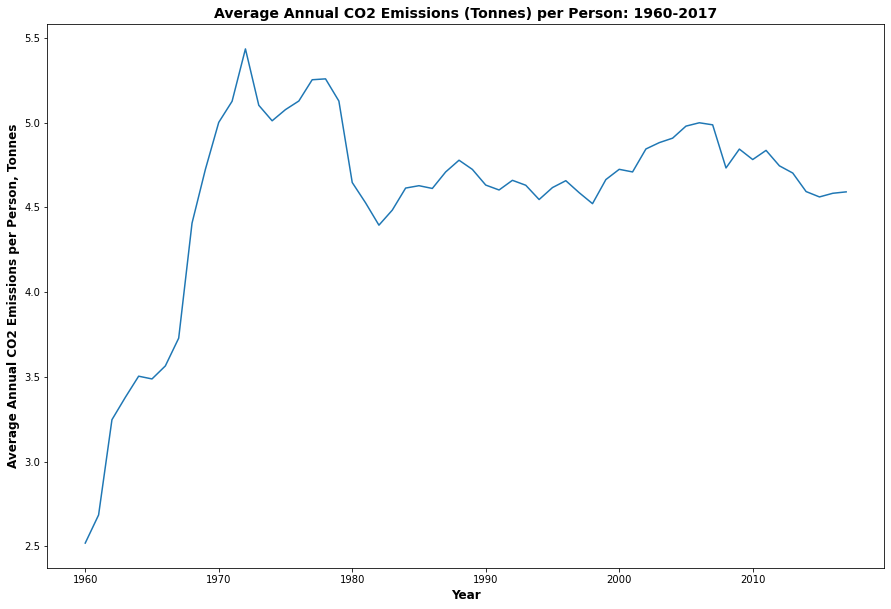

In [291]:
# create fig and a single axes/plot (ax)
fig, ax = plt.subplots(figsize=(15,10))

# line plot of average co2 emissions by year
df_co2_1d.mean().plot(figsize=(15,10), ax=ax)

# ax labeling (and legend if used)
ax.set_title('Average Annual CO2 Emissions (Tonnes) per Person: 1960-2017', size=14, weight='bold')
ax.set_ylabel('Average Annual CO2 Emissions per Person, Tonnes', size=12, weight='bold')
ax.set_xlabel('Year', size=12, weight='bold');

The Average Annual CO2 Emissions (Tonnes) per Person line chart above indicates that CO2 emissions per person-basis on average may have peaked and may be trending lower now over time. This may be partially to due to advances and efficiencies brought about by technology, as well as awareness, education, and becoming more environmentally-minded as a global community.

### 2D EDA Correlation Investigations
In this section we will explore potential relationships / correlations between the independent variables and the dependent variable using scatter plots with lines of best fit.

#### Scatter Plotting Overview
There are 3 scatter plots in total, one for each independent vs depdent variable. The code cell preceding each plot captures the code used to produce the scatter plot with a line of best fit and default 95% ci (confidence interval). In general, the plotting code is broken up as follows:
* Create a figure and a single axes/plot
* Select color palette (used when color/label differentiation is helpful)
* Initialize variables/data-structures
* Loop to plot each dataframe row/country x,y data and accummulate data for linear regression line plot
* Create dataframe for seaborn `regplot()` (regression line/line of best fit)
* Plot best fit line with default 95% confidence interval on the single figure axes
* Axes/plot labeling and legend.

Supporting explanatory notes regarding the scatter plotting loop:
* The loop was used to plot each pair of x,y data points for each country for each year.
* Before entering the loop a iteration counter "i" is initialized, and with each loop/country "c" iteration "i" increments resulting in each country/label having a different color.
* Also before entering the loop, empty "all_x_data" and "all_y_data" lists are created - these lists receive and hold the x, y data accessed and plotted in each loop/country "c" iteration.
* When entering the loop, a country name from the dataframe index is assigned to variable "c".
* Next, a new country-specific dataframe is created using the row data associated with the country "c". (A dataframe was created to facilitate accessing the data and building the iteration x,y data using list comprehensions.)
* In each iteration the x_data and y_data variables serve to hold the specific iteration/country data generated with the aforementioned list comprehensions. These 2 variables are overwritten with each loop interation.
* Once the "x_data" and "y_data" variable are populated (or overwritten), the scatter plot is made. Scatter plot parameters were chosen to improve the visualization (eg. Alpha, so overlapping values could be seen; Size, to further improve visability).
* Next, the current iteration/country specific x,y data are added to the "all_x_data" and "all_y_data" list variables.
* Finally, the iteration/color variable "i" is incremented so that the next country label and associated datapoints are a new color.

Following each plot there are **Plot Notes** and **Plot Observations & Potential Drivers/Rationalizations** sections.

**Note:** This the above overview section applies to all 3 scatter plots and will not be repeated to avoid redundant text.

#### Population Growth Rates Annual % vs Total Adult Literacy Rates

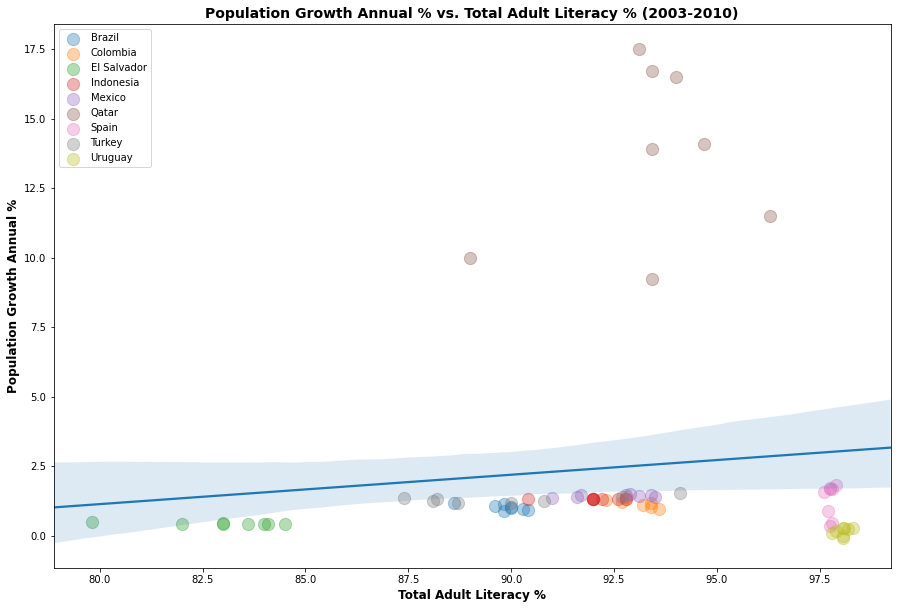

In [292]:
# create fig and a single axes/plot (ax)
fig, ax = plt.subplots(figsize=(15,10))

# select color palette for plotting series/countries
cmap = plt.get_cmap("tab10")

# initialize variables/datastructures for plotting via loop below
i = 0            # country loop iteration counter to change cmap-color for each country
all_x_data = []  # list to accummulate all x-data for line of best fit plot
all_y_data = []  # list to accummulate all y-data for line of best fit plot 

# loop to plot each dataframe row/country (c) x,y data and accummulate data for regression line plot
for c in pop_vs_lit.index:
    # create row/country-specific dataframe
    country = pd.DataFrame(pop_vs_lit.loc[c])
    # generate x,y data using list comprehensions
    x_data = [float(country.loc[lx]) for lx in country.index if lx[-1] == 'x']
    y_data = [float(country.loc[ly]) for ly in country.index if ly[-1] == 'y']
    # scatter plot
    plt.scatter(x=x_data, y=y_data, color=cmap(i), s=150, alpha=.35, label=c)
    # add current iteration/country specific x,y data to placeholders for best fit plotting
    all_x_data += x_data
    all_y_data += y_data
    # increment iteration count variable
    i += 1 

# create dataframe for seaborn regplot (regression line/line of best fit)
best_fit = pd.DataFrame({'x': all_x_data, 'y': all_y_data})

# plot best fit line with default 95% confidence interval on the single figure axes (ax)
sns.regplot(x='x', y='y', data=best_fit, scatter=False, truncate=False, ax=ax)

# ax labeling and legend
ax.set_title('Population Growth Annual % vs. Total Adult Literacy % (2003-2010)', size=14, weight='bold')
ax.set_xlabel('Total Adult Literacy %', size=12, weight='bold')
ax.set_ylabel('Population Growth Annual %', size=12, weight='bold')
ax.legend(loc='upper left');

**Plot Notes**
* A legend and different label colors were used in this case since there were only a small number of countries/labels and datapoints (i.e., congestion isn't an issue); and, I was curious to see if the high population growth %s (~10-18%) were potential outliers in a particular year or if they were all from a specific country.
* Based on the very limited dataset, more data and analysis would be required before considering using the results or potential correlations here.

**Plot Observations & Potential Drivers/Rationalizations**
* The line of best fit has a small positive slope indicating that there may be a weak positive correlation between Population Growth Annual % and Total Adult Literacy Rate - i.e. as the Adult literacy Rates increase, so might the rate of Population Growth (and vice versa).
* A potential factor/reason for this may be immigration (e.g. people relocating to more developed countries where education is readily accessible).
* The data points do cluster somewhat based on country, which seems rational over a fairly short timeframe - e.g. Government policies like immigration may not change quickly; Societal and cultural norms generally change slowly as well (e.g. women's rights, education reform, average family size).

#### Population Growth Rates Annual % vs Happiness Scores
Please see below code cell and scatter plot for Population Growth Rates Annual % vs Happiness Scores.

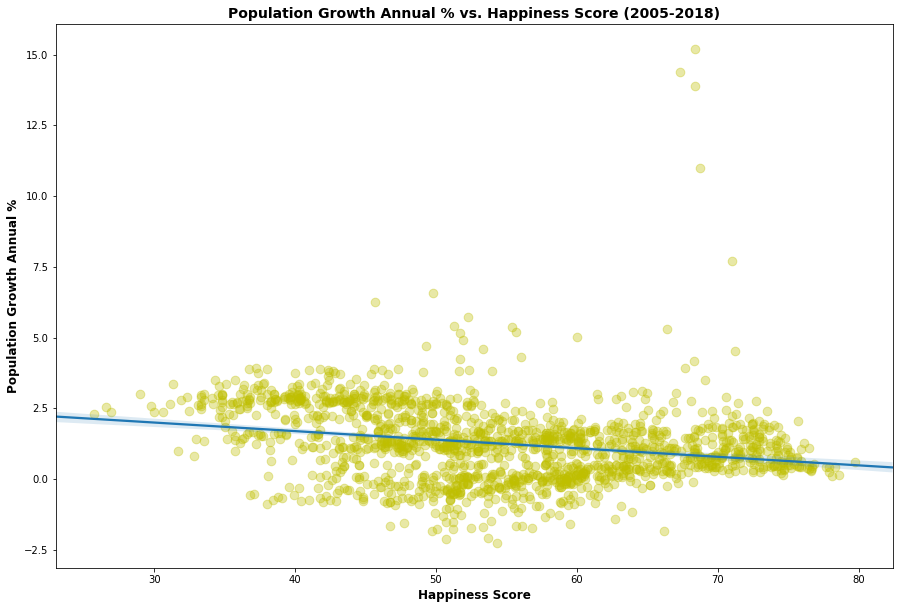

In [293]:
# create fig and a single axes/plot (ax)
fig, ax = plt.subplots(figsize=(15,10))

# select color palette for plotting series/countries
#cmap = plt.get_cmap("tab20") ...not required/used due to high number of data points and congestion

# initialize variables/datastructures for plotting via loop below
#i = 0           # country loop iteration counter to change cmap-color for each country...not required/used 
all_x_data = []  # list to accummulate all x-data for line of best fit plot
all_y_data = []  # list to accummulate all y-data for line of best fit plot 

# loop to plot each dataframe row/country (c) x,y data and accummulate data for regression line plot
for c in pop_vs_hap.index:
    # create row/country-specific dataframe
    country = pd.DataFrame(pop_vs_hap.loc[c])
    # generate x,y data using list comprehensions
    x_data = [float(country.loc[lx]) for lx in country.index if lx[-1] == 'x']
    y_data = [float(country.loc[ly]) for ly in country.index if ly[-1] == 'y']
    # scatter plot
    plt.scatter(x=x_data, y=y_data, color='y', s=75, alpha=.35, label=c)
    # add current iteration/country specific x,y data to placeholders for best fit plotting
    all_x_data += x_data
    all_y_data += y_data
    # increment iteration count variable
#   i += 1   ....not required/used due to many countries and congestion
        
# create dataframe for seaborn regplot (regression line/line of best fit)
best_fit = pd.DataFrame({'x': all_x_data, 'y': all_y_data})

# plot best fit line with default 95% confidence interval on the single figure axes (ax)
sns.regplot(x='x', y='y', data=best_fit, scatter=False, truncate=False, ax=ax)

# ax labeling and legend
ax.set_title('Population Growth Annual % vs. Happiness Score (2005-2018)', size=14, weight='bold')
ax.set_xlabel('Happiness Score', size=12, weight='bold')
ax.set_ylabel('Population Growth Annual %', size=12, weight='bold');

#ax.legend(loc='best') 
#...legend excluded due to very large number of countries/labels (far exceeded space available)

**Plot Notes**
* A legend was not used in this case since: 1) there was significant congestion based on the large number and clustering of data; 2) The large number of countries (115) in the dataset made the legend label list very long which did not display well in the report.
* The color yellow was used because it was a good contrast against the blue regression line.
* A low Alpha value was used for the datapoint markers to help see overlapping data.

**Plot Observations & Potential Drivers/Rationalizations**
* The line of best fit has a small negative slope indicating that there may be a weak negative correlation between Population Growth Annual % and Happiness Score - i.e. countries with higher population growth rates might tend to have lower happiness scores (or vice versa).
* A potential indirect/implicit reason for this may be that as countries become more developed^ birthrates tend to descrease because the population is more educated and aware of the responibilities of raising large families; it may also be because adults are in general busier (i.e. more readily available employment and education opportunities).

**^Assumption:** More-developed countries tend to be happier places based on safety and stability (e.g. stable government, established rule of law), healthier (e.g. modern health care), and opportunities available (e.g. education, employment).

#### Population Growth Rates Annual % vs CO2 Emissions (Tonnes) per Person
Please see below code cell and scatter plot for Population Growth Rates Annual % vs CO2 Emissions (Tonnes) per Person.

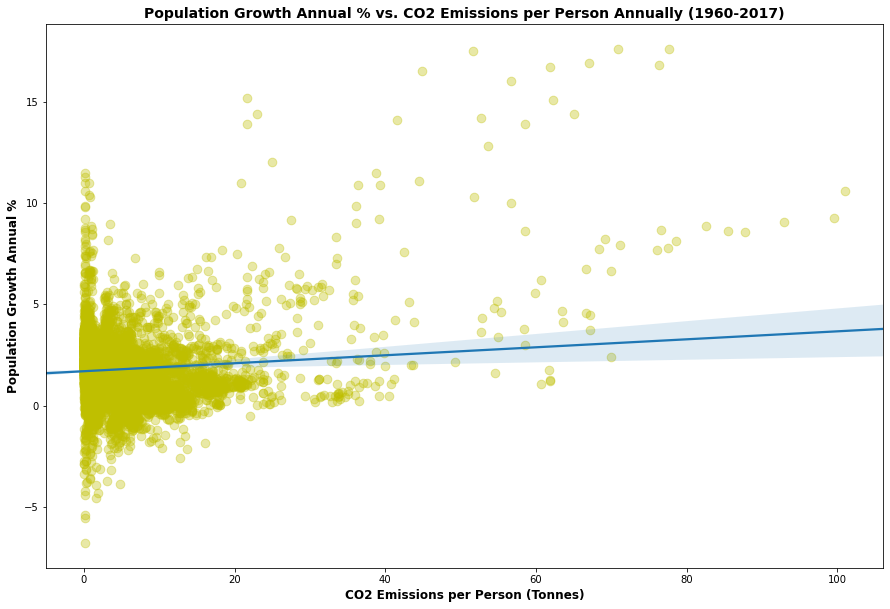

In [294]:
# create fig and a single axes/plot (ax)
fig, ax = plt.subplots(figsize=(15,10))

# select color palette for plotting series/countries
#cmap = plt.get_cmap("tab20") ...not required/used due to high number of data points and congestion

# initialize variables/datastructures for plotting via loop below
#i = 0            # country loop iteration counter to change cmap-color for each country...not required/used 
all_x_data = []  # list to accummulate all x-data for line of best fit plot
all_y_data = []  # list to accummulate all y-data for line of best fit plot 

# loop to plot each dataframe row/country (c) x,y data and accummulate data for regression line plot
for c in pop_vs_co2.index:
    # create row/country-specific dataframe
    country = pd.DataFrame(pop_vs_co2.loc[c])
    # generate x,y data using list comprehensions
    x_data = [float(country.loc[lx]) for lx in country.index if lx[-1] == 'x']
    y_data = [float(country.loc[ly]) for ly in country.index if ly[-1] == 'y']
    # scatter plot
    plt.scatter(x=x_data, y=y_data, color='y', s=75, alpha=.35, label=c)
    # add current iteration/country specific x,y data to placeholders for best fit plotting
    all_x_data += x_data
    all_y_data += y_data
    # increment iteration count variable
    #   i += 1   ....not required/used due to many countries and congestion
        
# create dataframe for seaborn regplot (regression line/line of best fit)
best_fit = pd.DataFrame({'x': all_x_data, 'y': all_y_data})

# plot best fit line with default 95% confidence interval on the single figure axes (ax)
sns.regplot(x='x', y='y', data=best_fit, scatter=False, truncate=False, ax=ax)

# ax labeling and legend
ax.set_title('Population Growth Annual % vs. CO2 Emissions per Person Annually (1960-2017)', size=14, weight='bold')
ax.set_xlabel('CO2 Emissions per Person (Tonnes)', size=12, weight='bold')
ax.set_ylabel('Population Growth Annual %', size=12, weight='bold');

#ax.legend(loc='best') 
#...legend excluded due to very large number of countries/labels (far exceeded space available)

**Plot Notes**
* A legend was not used in this case since: 1) there was significant congestion based on the large number and clustering of data; 2) The large number of countries (179) in the dataset made the legend label list very long which did not display well in the report.
* The color yellow was used because it was a good contrast against the blue regression line.
* A low Alpha value was used for the datapoint markers to help see overlapping data.

**Plot Observations & Potential Drivers/Rationalizations**
* The line of best fit has a small positive slope indicating that there may be a weak positive correlation between Population Growth Annual % and CO2 Emissions (Tonnes) per Person. This potential correlation suggests that the more quickly population expands, the more carbon intensive the country becomes.
* Perhaps an increase in carbon intensity results due to inefficiencies and sub-optimal solutions implemented for energy, infrastructure, transportation, systems, etc. driven by the fast pace at which they are needed; or, maybe countries with the highest rates are undeveloped and just do not have the techology - e.g. carbon-fired energy generation vs. nuclear or natural gas-fired power generation.

<a id='conclusions'></a>
## Conclusions
No statistical conclusions can be made since no statistical tests were carried out; however, some findings/observations and potential correlations identified from descriptive statistics and plotting are summarized below:

### 1D Investigations
Based on the data investigated, the question set answers are provided below

Population Growth Annual % Rates (dependent variable)
> * United Arab Emirates had the highest average growth rate.
> * Global annual population growth rate appears to be trending downward (growth is decelerating).

Total Adult Literacy Rate (independent variable)
> * Uruguay had the highest adult literacy rate.
> * Adult literacy might be improving globally (Note: the literacy dataset was very limited).

Happiness Score (independent variable)
> * Top countries in terms of Happiness Score in descending order: 1) Denmark 2) Finland 3) Netherlands 4) Canada 5) Sweden. Of note, 3 of the top 5 are Nordic Countries.
> * Overall the investigation indicated that Happiness (Scores) of countries may be improving.

CO2 Emissions (Tonnes) per Person (independent variable)
> * C1. Qatar appears to have the highest CO2 emissions per person.
> * C2. Overall the investigation indicates that CO2 emissions per person may have peaked and are slowly improving.

### 2D Investigations
Indications from correlation investigations between the Population Growth Annual % Rates (Dependent Variable) and the following Independent Variables:
> * Total Adult Literacy Rates: Potentially a weak positive correlation (however, the dataset was very limited)
> * Happiness Scores: Potentially a weak negative correlation.
> * CO2 Emissions (Tonnes) per Person: Potentially a weak positive correlation.

### Limitations
The investigation and observations/findings/indications/rationalizations/etc. in this report should be regarded as cursory due to, for example:
* Some of the datasets were very sparse, and limited in number of years and/or countries
* Some data was lost/discarded as part of the data wrangling effort
* Missing data that remained after the initialy data cleaning were filled mean values
* The dataset sources have not been researched thoroughly and the author lacks the domain expertise.

Additional research, data gathering, wrangling and analysis is required.

<a id='references'></a>
## References

**Gapminder Datasets (https://www.gapminder.org/data/):**

[1] World Bank Data (https://data.worldbank.org/indicator/SP.POP.GROW), No specific dataset version found. Downloaded Oct. 28, 2021.

[2] UNESCO Institute for Statistics (UIS) (http://data.uis.unesco.org/), September 2021 release. Downloaded Oct. 29, 2021.

[3] WHR-Happiness Score Dataset (http://gapm.io/dhapiscore_whr), Version 2 updated April 16 2021. Downloaded Oct. 29, 2021.

[4] Carbon Dioxide Information Analysis Center (https://cdiac.ess-dive.lbl.gov/), No specific dataset version found. Downloaded Oct. 28, 2021.

**General**

The following sources were referenced for available functions/methods and parameters, documentation, syntax, examples, etc. 
* Udacity Data Analyst Nanodegree Documentation/Cirriculum
* https://pandas.pydata.org
* https://numpy.org
* https://www.python.org
* https://enterprise.github.com/downloads/en/markdown-cheatsheet.pdf
* https://www.w3schools.com/python/default.asp
* https://stackoverflow.com/questions/45269652/python-convert-string-to-float-error-with-negative-numbers
* https://home.unicode.org
* https://matplotlib.org/stable/
* https://seaborn.pydata.org/#
* https://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/